# Import Dependencies

In [ ]:
import atd2022
import torch
import pandas as pd
import numpy as np
from atd_informer import atd_informer
from utils.tools import dotdict
from atd_wrapper import InformerForcaster
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [ ]:
import importlib
importlib.reload(atd_informer)

In [ ]:
import torch
torch.cuda.is_available()

# Small Scale Testing (pls ignore)

In [3]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=0

args.cols=1
args.checkpoints = "/Users/will/Desktop/tmp"



args.seq_len=5
args.label_len=3
args.pred_len=1


args.batch_size = 1
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=3

In [4]:
informer = atd_informer.ATD_Informer

#### Model Training (ignore pls)

In [5]:
for ii in range(args.itr):
        # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = informer(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)
    

TypeError: __init__() missing 1 required positional argument: 'df'

### Generate Prediction (Ignore Pls)

#setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                                                                                                     args.seq_len, args.label_len, args.pred_len,
                                                                                                     args.d_model, args.n_heads, args.e_layers, args.d_layers,
                                                                                                     args.d_ff, args.attn, args.factor, args.embed, args.distil, 
                                                                                                     args.mix, args.des)

In [6]:
setting= "string"

In [7]:
exp.predict(setting)


check data_x shape (8, 20)
check data_y shape (8, 20)
data_x [[ 3  3  4 21  3  4  0  5  0  0  0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  3  0  0  2  1  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 7  5 26 22  5  0  0  1  1  0  3  1  0  0  0  0  1  0  0  0]
 [13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]]
data_y [[ 3  3  4 21  3  4  0  5  0  0  0  0  0  0  0  0 14  0  1  0]
 [ 0  0  0  3  0  0  2  1  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 7  5 26 22  5  0  0  1  1  0  3  1  0  0  0  0  1  0  0  0]
 [13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  

In [8]:
prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(4, 1, 20)

In [9]:
prediction

array([[[ 6.8321867e+00,  4.1660962e+00,  5.5001898e+00,  1.3873180e+01,
          4.5615072e+00,  1.6799215e+00,  1.7307360e+00,  1.9218162e+00,
          1.6953726e+00,  1.4328616e+00,  1.7674569e+00,  1.1856138e+00,
          7.7103615e-01,  3.1425217e-01,  2.0257424e-01,  6.5961373e-01,
          1.4129713e+00,  3.5161200e-01,  1.3668158e+00, -7.2176936e-03]],

       [[ 6.8742909e+00,  3.9449117e+00,  5.3744726e+00,  1.3874529e+01,
          4.5440998e+00,  1.5384877e+00,  1.7218031e+00,  1.8847367e+00,
          1.8090762e+00,  1.4132628e+00,  1.6957563e+00,  1.2538692e+00,
          8.0295253e-01,  3.5027868e-01,  2.6355246e-01,  6.1726761e-01,
          1.4184737e+00,  3.3506823e-01,  1.2761524e+00, -3.8309142e-02]],

       [[ 6.8484159e+00,  4.1268854e+00,  5.3488512e+00,  1.3879792e+01,
          4.6213698e+00,  1.5509696e+00,  1.6716541e+00,  2.0483508e+00,
          1.7572607e+00,  1.5358107e+00,  1.7793263e+00,  1.2569684e+00,
          8.8902807e-01,  4.5104560e-01,  1.3

# Testing ATD Protocal (Passed)

In [4]:
truth = atd2022.io.read_csv()

In [10]:
test = truth[["AA", "AC"]]

In [11]:
test.head()

Region                AA                                                      \
Event                 01 02  03  04 05   06 07 08 09 10 11 12 13 14 15 16 17   
2013-12-30/2014-01-05  0  0   0   6  0    0  0  0  0  0  0  0  0  0  0  0  0   
2014-01-06/2014-01-12  2  0   0  11  0    1  0  0  0  0  0  0  0  0  0  0  0   
2014-01-13/2014-01-19  0  1   3   7  1    0  0  0  0  0  1  0  0  0  0  0  0   
2014-01-20/2014-01-26  0  1   0   4  0    0  0  2  0  0  0  0  0  0  0  1  0   
2014-01-27/2014-02-02  6  1  59   3  0  103  0  4  0  0  0  0  0  0  0  0  0   

Region                         AC                                             \
Event                 18 19 20 01 02 03  04 05 06 07 08 09 10 11 12 13 14 15   
2013-12-30/2014-01-05  0  0  0  4  4  6   9  0  0  1  1  1  0  1  0  0  0  0   
2014-01-06/2014-01-12  0  0  0  5  0  8  34  2  1  1  0  0  0  0  2  0  0  0   
2014-01-13/2014-01-19  0  1  0  1  0  4   3  0  2  0  0  0  0  0  0  0  0  0   
2014-01-20/2014-01-26  0  0  0  3  0  6   1  1  0  0  0  0  0  2  0  0  0  0   
2014-01-27/2014-02-02  0  0  0  8  2  2  47  6  4  3  0  0  0  0  2  1  0  0   

Region                                 
Event                 16  17 18 19 20  
2013-12-30/2014-01-05  0  11  0  0  0  
2014-01-06/2014-01-12  0   4  0  3  0  
2014-01-13/2014-01-19  0   1  1  1  0  
2014-01-20/2014-01-26  0   0  0  3  0  
2014-01-27/2014-02-02  0   3  0  0  0

In [28]:
truth.index

PeriodIndex(['2013-12-30/2014-01-05', '2014-01-06/2014-01-12',
             '2014-01-13/2014-01-19', '2014-01-20/2014-01-26',
             '2014-01-27/2014-02-02', '2014-02-03/2014-02-09',
             '2014-02-10/2014-02-16', '2014-02-17/2014-02-23',
             '2014-02-24/2014-03-02', '2014-03-03/2014-03-09',
             ...
             '2015-11-16/2015-11-22', '2015-11-23/2015-11-29',
             '2015-11-30/2015-12-06', '2015-12-07/2015-12-13',
             '2015-12-14/2015-12-20', '2015-12-21/2015-12-27',
             '2015-12-28/2016-01-03', '2016-01-04/2016-01-10',
             '2016-01-11/2016-01-17', '2016-01-18/2016-01-24'],
            dtype='period[W-SUN]', length=108)

In [10]:
cols = truth.columns

In [15]:
type(cols)

pandas.core.indexes.multi.MultiIndex

In [25]:
tmp = truth.to_numpy()

In [30]:
test_df = pd.DataFrame(data=tmp, index = truth.index, columns = truth.columns)

In [9]:
exp = InformerForcaster(args)

In [10]:
exp.fit(test)

got here
Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl96_ll48_pl1_dm512_nh8_el4_dl3_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 2.211230516433716
Epoch: 1, Steps: 1 | Train Loss: 118.4866562 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 2 cost time: 0.1260998249053955
Epoch: 2, Steps: 1 | Train Loss: 117.1688843 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
0
got here
Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl96_ll48_pl1_dm512_nh8_el4_dl3_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.29504871368408203
Epoch: 1, Steps: 1 | Train Loss: 808.9169312 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Updating learning rate to 1e-

In [11]:
exp.predict()

Event                  01  02  03  04  05  06  07  08  09  10  11  12  13  14  \
2018-01-08/2018-01-14  13   9  20  85   4   2   0   2   8   0   0   0   0   0   
2018-01-15/2018-01-21  14   5   8  10   1   0   0   1   0   1   0   1   0   0   
2018-01-22/2018-01-28   5   2   0  23   3   2   5   1   0   0   2   0   0   0   
2018-01-29/2018-02-04   3   2   7  37   6  10   4   7   0   1   1   1   0   0   
2018-02-05/2018-02-11   7   6   7  49   6   0   1   2   2   2   6   0   1   0   

Event                  15  16  17  18  19  20  
2018-01-08/2018-01-14   0   1   8   0   0   0  
2018-01-15/2018-01-21   0   0   3   0   2   0  
2018-01-22/2018-01-28   0   3   4   0   4   0  
2018-01-29/2018-02-04   0   0   0   0   0   0  
2018-02-05/2018-02-11   0   0   2   0   4   0  
[-1. -1. -1.  1. -0.  0. -1.  1. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0.
 -1. -0.]
Event                    01   02   03    04   05    06   07   08   09   10  \
2018-01-15/2018-01-21  14.0  5.0  8.0  10.0  1.0   0.0  0.0  1.0

Event                   01   02   03   04   05   06   07   08   09   10   11  \
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2018-02-19/2018-02-25  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2018-03-05/2018-03-11  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

Event                   12   13   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2018-02-19/2018-02-25  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2018-02-26/2018-03-04  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2018-03-05/2018-03-11  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

In [23]:
exp.predict()

Region                  AA                                                     \
Event                   01   02   03    04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  9.0  5.0  7.0  18.0  5.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-02-19/2018-02-25  9.0  5.0  7.0  18.0  6.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-02-26/2018-03-04  9.0  5.0  7.0  18.0  5.0  2.0  1.0  2.0  2.0  1.0  3.0   
2018-03-05/2018-03-11  9.0  5.0  7.0  18.0  6.0  2.0  2.0  2.0  2.0  1.0  3.0   

Region                                                                AC  \
Event                   12   13   14   15   16   17   18   19   20    01   
2018-02-12/2018-02-18  2.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-02-19/2018-02-25  1.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-02-26/2018-03-04  2.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   
2018-03-05/2018-03-11  1.0  1.0  0.0  0.0  0.0  3.0  1.0  2.0  0.0  14.0   

Region                                                                      \
Event                    02   03    04    05   06   07   08   09   10   11   
2018-02-12/2018-02-18  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-02-19/2018-02-25  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-02-26/2018-03-04  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   
2018-03-05/2018-03-11  10.0  9.0  21.0  11.0  4.0  5.0  5.0  3.0  3.0  8.0   

Region                                                              
Event                   12   13   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-02-19/2018-02-25  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-02-26/2018-03-04  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0  
2018-03-05/2018-03-11  4.0  3.0  1.0  0.0  1.0  7.0  1.0  5.0  0.0

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

8

In [24]:
for i in range(8):
    print(torch.cuda.get_device_name(i))

Quadro RTX 8000
Quadro RTX 8000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000
Quadro RTX 5000


In [9]:
lst = exp.model_list

In [10]:
len(lst)

1

In [11]:
test_mod = exp.model_list[0]

In [12]:
setting="str"

In [13]:
pred =test_mod.predict()

x,y [[13  9 20 85  4  2  0  2  8  0  0  0  0  0  0  1  8  0  0  0]
 [14  5  8 10  1  0  0  1  0  1  0  1  0  0  0  0  3  0  2  0]
 [ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]] [[ 5  2  0 23  3  2  5  1  0  0  2  0  0  0  0  3  4  0  4  0]
 [ 3  2  7 37  6 10  4  7  0  1  1  1  0  0  0  0  0  0  0  0]
 [ 7  6  7 49  6  0  1  2  2  2  6  0  1  0  0  0  2  0  4  0]]


In [14]:
pred

array([ 6.490034  ,  4.462694  ,  5.8469057 , 13.973756  ,  4.458868  ,
        1.6943204 ,  1.80356   ,  1.9661559 ,  1.8184396 ,  1.4654043 ,
        2.014461  ,  1.276834  ,  1.0240163 ,  0.4990942 ,  0.05070882,
        0.6254189 ,  1.1649    ,  0.27910122,  0.85286796, -0.02110814],
      dtype=float32)

In [10]:
a1=np.array([1,2,3])

In [11]:
a2=np.array([2,3,4])

In [13]:
np.concatenate([a1,a2])

array([1, 2, 3, 2, 3, 4])

In [16]:
truth = atd2022.io.read_csv()

In [11]:
truth.tail()

Region                 AA                                                     \
Event                  01 02  03  04 05  06 07 08 09 10 11 12 13 14 15 16 17   
2018-01-08/2018-01-14  13  9  20  85  4   2  0  2  8  0  0  0  0  0  0  1  8   
2018-01-15/2018-01-21  14  5   8  10  1   0  0  1  0  1  0  1  0  0  0  0  3   
2018-01-22/2018-01-28   5  2   0  23  3   2  5  1  0  0  2  0  0  0  0  3  4   
2018-01-29/2018-02-04   3  2   7  37  6  10  4  7  0  1  1  1  0  0  0  0  0   
2018-02-05/2018-02-11   7  6   7  49  6   0  1  2  2  2  6  0  1  0  0  0  2   

Region                          AC                                           \
Event                 18 19 20  01  02  03   04  05 06  07  08 09 10  11 12   
2018-01-08/2018-01-14  0  0  0  34   9  14  107   3  2   6   3  0  1   8  7   
2018-01-15/2018-01-21  0  2  0  36  11  13   67  18  6   7  12  7  5  20  2   
2018-01-22/2018-01-28  0  4  0  24  13   9   40  12  9   4   5  1  3  21  5   
2018-01-29/2018-02-04  0  0  0  21  13  12   46  17  6  10   6  1  4  17  1   
2018-02-05/2018-02-11  0  4  0  32  12  23   64  13  8   7  28  4  4  12  3   

Region                                             AE                       \
Event                  13 14 15 16  17 18  19 20   01   02   03    04   05   
2018-01-08/2018-01-14  16  1  0  2   3  0  18  0  421  204  340   975  494   
2018-01-15/2018-01-21   3  0  0  0   1  0   6  0  474  182  596  1277  390   
2018-01-22/2018-01-28   1  1  0  1   2  0   6  0  516  201  710  1301  444   
2018-01-29/2018-02-04   2  1  0  0   9  0   4  0  419  190  411  1011  441   
2018-02-05/2018-02-11   4  0  0  0  15  0   1  0  639  250  946  2613  603   

Region                                                                      \
Event                   06   07   08  09  10   11  12  13  14  15  16   17   
2018-01-08/2018-01-14   87  111   82  58  31  158  67  33  25  13  23  169   
2018-01-15/2018-01-21  106  169   85  50  35  160  65  21  14   6  55  139   
2018-01-22/2018-01-28  135  156   98  93  59  270  62  33  29   6  33  153   
2018-01-29/2018-02-04  101  164  172  61  40  214  70  18  12   4  37  183   
2018-02-05/2018-02-11  125  161  126  57  58  190  76  35  25  13  33  217   

Region                               AF                                      \
Event                  18   19 20    01   02   03    04   05   06   07   08   
2018-01-08/2018-01-14  20   96  0   964  357  419  1612  480  221  267  304   
2018-01-15/2018-01-21  17   79  0  1608  441  522  2752  617  271  304  384   
2018-01-22/2018-01-28  32  131  0  1801  532  377  1778  586  272  374  450   
2018-01-29/2018-02-04  32  139  0  1629  587  491  2672  627  281  342  492   
2018-02-05/2018-02-11  26  115  0  1175  368  453  1805  703  178  310  344   

Region                                                                        \
Event                   09   10    11   12   13  14  15   16   17   18    19   
2018-01-08/2018-01-14   72  110   496  189  162  17  42  135  250  159  1245   
2018-01-15/2018-01-21   95  126   622  214  181  36  82  106  313  302  1790   
2018-01-22/2018-01-28  154  128  1141  198  256  62  98  166  306  556  2571   
2018-01-29/2018-02-04  142  106  1052  266  212  52  91   94  294  411  1820   
2018-02-05/2018-02-11  100  124   614  173  117  42  94   76  322  232  1445   

Region                    AG                                                  \
Event                 20  01  02  03   04  05  06  07  08  09  10  11  12 13   
2018-01-08/2018-01-14  0  94  73  17  195  56  26  23  12   8  19  36  17  1   
2018-01-15/2018-01-21  3  69  42  51  182  66  45  29  24   9   9  31  27  7   
2018-01-22/2018-01-28  1  68  31  52  239  78  23  24  33   5   8  34  12  6   
2018-01-29/2018-02-04  6  76  42  43  187  56  36  18  13  25  14  23  27  6   
2018-02-05/2018-02-11  4  83  38  29  241  88  22  17  21  20  16  69  32  7   

Region                                            AJ                          \
Event                 14  15  16  1

In [12]:
dt=truth.index[-1]

In [13]:
dt

Period('2018-02-05/2018-02-11', 'W-SUN')

In [14]:
dt+1

Period('2018-02-12/2018-02-18', 'W-SUN')

In [15]:
dt+2

Period('2018-02-19/2018-02-25', 'W-SUN')

In [16]:
dt+3

Period('2018-02-26/2018-03-04', 'W-SUN')

In [17]:
dt+4

Period('2018-03-05/2018-03-11', 'W-SUN')

# VRAM Optimized Small Scale Testing

In [4]:
truth = atd2022.io.read_csv()

In [5]:
test1=truth["AA"]

In [5]:
test = truth[["AA", "AC"]]

In [6]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 1024 # dimension of model
args.n_heads = 12 # num of heads
args.e_layers = 4 # num of encoder layers
args.d_layers = 3 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=0


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"


"""
args.seq_len=96
args.label_len=48
args.pred_len=1


args.batch_size = 24
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=2
args.train_epochs=250
args.patience=25
"""

args.seq_len=12
args.label_len=6
args.pred_len=1


args.batch_size = 1
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=3

In [7]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 1024 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=48
args.label_len=24
args.pred_len=1


args.batch_size = 50
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=5

In [8]:
exp = InformerForcaster(args)

In [9]:
exp.fit(test)

Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 1.7275519371032715
Epoch: 1, Steps: 2 | Train Loss: 74.3725548 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
0
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl48_ll24_pl1_dm512_nh8_el2_dl2_df1024_atprob_fc5_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.10946297645568848
Epoch: 1, Steps: 2 | Train Loss: 498.2518921 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
1


In [10]:
lst=exp.predict([1,2,3,4])

In [11]:
lst

Region                  AA                                                    \
Event                   01   02   03   04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2018-02-19/2018-02-25  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
2018-03-05/2018-03-11  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   

Region                                                               AC       \
Event                   12   13   14   15   16   17   18   19   20   01   02   
2018-02-12/2018-02-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-02-19/2018-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-02-26/2018-03-04  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2018-03-05/2018-03-11  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

Region                                                                        \
Event                   03   04   05   06   07   08   09   10   11   12   13   
2018-02-12/2018-02-18  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
2018-02-19/2018-02-25  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2018-02-26/2018-03-04  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2018-03-05/2018-03-11  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

Region                                                    
Event                   14   15   16   17   18   19   20  
2018-02-12/2018-02-18  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
2018-02-19/2018-02-25  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2018-02-26/2018-03-04  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2018-03-05/2018-03-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [14]:
type(lst.columns)

pandas.core.indexes.base.Index

# Full Scale Testing on ATD Protocol (Running)

In [18]:
torch.cuda.set_device(1) 

In [19]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 6 # probsparse attn factor
args.d_model = 300 # dimension of model
args.n_heads = 10 # num of heads
args.e_layers = 3 # num of encoder layers
args.d_layers = 3 # num of decoder layers
args.d_ff = 512 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = False # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=32
args.label_len=12
args.pred_len=1


args.batch_size = 32
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=15
args.patience=5

In [20]:
lispDL = InformerForcaster(args)

In [21]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<atd_wrapper.InformerForcaster object at 0x7fa318db9d30>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07498669624328613
Epoch: 1, Steps: 1 | Train Loss: 61.2528191 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06989336013793945
Epoch: 2, Steps: 1 | Train Loss: 57.5699234 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06949520111083984
Epoch: 3, Steps: 1 | Train Loss: 54.5599747 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06658434867858887
Epoch: 4, Steps: 1 | Train Loss: 53.3460579 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0647735595703125
Epoch: 11, Steps: 1 | Train Loss: 116163.1796875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06433463096618652
Epoch: 12, Steps: 1 | Train Loss: 116159.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06512618064880371
Epoch: 13, Steps: 1 | Train Loss: 116161.6406250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06697487831115723
Epoch: 14, Steps: 1 | Train Loss: 116159.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06976532936096191
Epoch: 15, Steps: 1 | Train Loss: 116165.4609375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
2
Use GPU: cuda:None
freq is  w
freq is no

Epoch: 6, Steps: 1 | Train Loss: 51581.1718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06632232666015625
Epoch: 7, Steps: 1 | Train Loss: 51570.6953125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06533455848693848
Epoch: 8, Steps: 1 | Train Loss: 51564.7304688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06564116477966309
Epoch: 9, Steps: 1 | Train Loss: 51558.1054688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06559133529663086
Epoch: 10, Steps: 1 | Train Loss: 51561.0937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06526994705200195
Epoch: 11, Steps: 1 |

Epoch: 1 cost time: 0.09762859344482422
Epoch: 1, Steps: 1 | Train Loss: 21.5022812 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.09393668174743652
Epoch: 2, Steps: 1 | Train Loss: 20.4970837 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.09279370307922363
Epoch: 3, Steps: 1 | Train Loss: 19.7414608 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.09366703033447266
Epoch: 4, Steps: 1 | Train Loss: 19.4652138 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.08681464195251465
Epoch: 5, Steps: 1 | Train Loss: 19.2373943 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.08348679542541504
Epoch: 6, Steps: 1 | Train Loss

Epoch: 14 cost time: 0.07163190841674805
Epoch: 14, Steps: 1 | Train Loss: 10.1939497 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0722193717956543
Epoch: 15, Steps: 1 | Train Loss: 10.1806002 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
10
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.08418154716491699
Epoch: 1, Steps: 1 | Train Loss: 26751.1074219 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07914280891418457
Epoch: 2, Steps: 1 | Train Loss: 26619.1132812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-

Epoch: 10 cost time: 0.06466102600097656
Epoch: 10, Steps: 1 | Train Loss: 36802.9179688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06574797630310059
Epoch: 11, Steps: 1 | Train Loss: 36797.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0738978385925293
Epoch: 12, Steps: 1 | Train Loss: 36800.4140625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.08145856857299805
Epoch: 13, Steps: 1 | Train Loss: 36799.9218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07819032669067383
Epoch: 14, Steps: 1 | Train Loss: 36798.9492188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06890177726745605
Epoch: 15, Steps: 1 | Train Loss: 3679

Epoch: 6 cost time: 0.06462335586547852
Epoch: 6, Steps: 1 | Train Loss: 20465.2910156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06485867500305176
Epoch: 7, Steps: 1 | Train Loss: 20458.4160156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07075285911560059
Epoch: 8, Steps: 1 | Train Loss: 20457.7636719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06362009048461914
Epoch: 9, Steps: 1 | Train Loss: 20452.8183594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07414889335632324
Epoch: 10, Steps: 1 | Train Loss: 20449.2109375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0

Epoch: 2 cost time: 0.06687474250793457
Epoch: 2, Steps: 1 | Train Loss: 560.7768555 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06909441947937012
Epoch: 3, Steps: 1 | Train Loss: 545.8898315 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06718754768371582
Epoch: 4, Steps: 1 | Train Loss: 539.1301880 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06660270690917969
Epoch: 5, Steps: 1 | Train Loss: 532.9935913 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06508994102478027
Epoch: 6, Steps: 1 | Train Loss: 531.7670288 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.065412521362

Epoch: 14 cost time: 0.0911870002746582
Epoch: 14, Steps: 1 | Train Loss: 9651.6269531 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.09194731712341309
Epoch: 15, Steps: 1 | Train Loss: 9652.6210938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
21
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.061870574951171875
Epoch: 1, Steps: 1 | Train Loss: 142729.2812500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06534314155578613
Epoch: 2, Steps: 1 | Train Loss: 142441.0156250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate

Epoch: 10 cost time: 0.0707244873046875
Epoch: 10, Steps: 1 | Train Loss: 590.5401001 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07167506217956543
Epoch: 11, Steps: 1 | Train Loss: 590.3876343 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07074666023254395
Epoch: 12, Steps: 1 | Train Loss: 590.6276855 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07103991508483887
Epoch: 13, Steps: 1 | Train Loss: 590.9904785 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07186055183410645
Epoch: 14, Steps: 1 | Train Loss: 590.3280029 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07075810432434082
Epoch: 15, Steps: 1 | Train Loss: 590.2659302 Va

Epoch: 6 cost time: 0.08155679702758789
Epoch: 6, Steps: 1 | Train Loss: 2874.4167480 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07843756675720215
Epoch: 7, Steps: 1 | Train Loss: 2872.4379883 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07323193550109863
Epoch: 8, Steps: 1 | Train Loss: 2871.5310059 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07599472999572754
Epoch: 9, Steps: 1 | Train Loss: 2870.9487305 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0662393569946289
Epoch: 10, Steps: 1 | Train Loss: 2870.4003906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06659

Epoch: 1 cost time: 0.0705251693725586
Epoch: 1, Steps: 1 | Train Loss: 0.3240614 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06387782096862793
Epoch: 2, Steps: 1 | Train Loss: 0.1107039 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06548762321472168
Epoch: 3, Steps: 1 | Train Loss: 0.1305764 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06482625007629395
Epoch: 4, Steps: 1 | Train Loss: 0.1345179 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06540656089782715
Epoch: 5, Steps: 1 | Train Loss: 0.1207454 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06476044654846191
Epoch: 6, Steps: 1 | Train Loss: 0.11

Epoch: 14 cost time: 0.0665121078491211
Epoch: 14, Steps: 1 | Train Loss: 2916.0556641 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06798171997070312
Epoch: 15, Steps: 1 | Train Loss: 2916.6367188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
32
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06972742080688477
Epoch: 1, Steps: 1 | Train Loss: 23241.2851562 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06961417198181152
Epoch: 2, Steps: 1 | Train Loss: 23099.5332031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to

Epoch: 10 cost time: 0.07244443893432617
Epoch: 10, Steps: 1 | Train Loss: 3292.3339844 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06874942779541016
Epoch: 11, Steps: 1 | Train Loss: 3291.7507324 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06265497207641602
Epoch: 12, Steps: 1 | Train Loss: 3291.0156250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06776928901672363
Epoch: 13, Steps: 1 | Train Loss: 3291.7399902 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07262945175170898
Epoch: 14, Steps: 1 | Train Loss: 3291.8669434 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07324385643005371
Epoch: 15, Steps: 1 | Train Loss: 3291.318

Epoch: 6 cost time: 0.07754087448120117
Epoch: 6, Steps: 1 | Train Loss: 24456.0175781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.08294105529785156
Epoch: 7, Steps: 1 | Train Loss: 24447.1621094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07633280754089355
Epoch: 8, Steps: 1 | Train Loss: 24445.1386719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07095122337341309
Epoch: 9, Steps: 1 | Train Loss: 24437.9824219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.066253662109375
Epoch: 10, Steps: 1 | Train Loss: 24438.8320312 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0

Epoch: 2 cost time: 0.06632447242736816
Epoch: 2, Steps: 1 | Train Loss: 2409.8024902 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06674623489379883
Epoch: 3, Steps: 1 | Train Loss: 2377.7158203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06666398048400879
Epoch: 4, Steps: 1 | Train Loss: 2363.9460449 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06531000137329102
Epoch: 5, Steps: 1 | Train Loss: 2351.0827637 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.05861830711364746
Epoch: 6, Steps: 1 | Train Loss: 2348.4934082 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0747439

Epoch: 14 cost time: 0.07224535942077637
Epoch: 14, Steps: 1 | Train Loss: 4246455.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07189512252807617
Epoch: 15, Steps: 1 | Train Loss: 4246454.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
43
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07269406318664551
Epoch: 1, Steps: 1 | Train Loss: 9488.7041016 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.08096790313720703
Epoch: 2, Steps: 1 | Train Loss: 9410.4599609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning ra

Epoch: 10 cost time: 0.07461881637573242
Epoch: 10, Steps: 1 | Train Loss: 12728.4257812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0745849609375
Epoch: 11, Steps: 1 | Train Loss: 12726.5673828 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06893038749694824
Epoch: 12, Steps: 1 | Train Loss: 12723.9072266 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07836556434631348
Epoch: 13, Steps: 1 | Train Loss: 12724.3388672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07243061065673828
Epoch: 14, Steps: 1 | Train Loss: 12724.7734375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07235407829284668
Epoch: 15, Steps: 1 | Train Loss: 12726.1

Epoch: 6 cost time: 0.0700979232788086
Epoch: 6, Steps: 1 | Train Loss: 22294.7539062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0742650032043457
Epoch: 7, Steps: 1 | Train Loss: 22289.5566406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07807731628417969
Epoch: 8, Steps: 1 | Train Loss: 22287.1757812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07142066955566406
Epoch: 9, Steps: 1 | Train Loss: 22284.9218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07471609115600586
Epoch: 10, Steps: 1 | Train Loss: 22283.1542969 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0

Epoch: 2 cost time: 0.06859111785888672
Epoch: 2, Steps: 1 | Train Loss: 2380.8366699 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07026243209838867
Epoch: 3, Steps: 1 | Train Loss: 2350.7211914 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07071280479431152
Epoch: 4, Steps: 1 | Train Loss: 2335.8171387 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07584047317504883
Epoch: 5, Steps: 1 | Train Loss: 2325.0571289 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06732058525085449
Epoch: 6, Steps: 1 | Train Loss: 2321.1325684 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0790302

Epoch: 13 cost time: 0.06716465950012207
Epoch: 13, Steps: 1 | Train Loss: 28.6386356 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06615185737609863
Epoch: 14, Steps: 1 | Train Loss: 28.6661472 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0662236213684082
Epoch: 15, Steps: 1 | Train Loss: 28.6573524 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
54
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06388092041015625
Epoch: 1, Steps: 1 | Train Loss: 28.9580364 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06896996498

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06606340408325195
Epoch: 9, Steps: 1 | Train Loss: 36430.6679688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06881856918334961
Epoch: 10, Steps: 1 | Train Loss: 36435.7382812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06705498695373535
Epoch: 11, Steps: 1 | Train Loss: 36433.2421875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07060503959655762
Epoch: 12, Steps: 1 | Train Loss: 36430.7226562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06746435165405273
Epoch: 13, Steps: 1 | Train Loss: 36428.5664062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06704902648925781
Epoch: 

Epoch: 5 cost time: 0.06599664688110352
Epoch: 5, Steps: 1 | Train Loss: 0.0980546 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06551742553710938
Epoch: 6, Steps: 1 | Train Loss: 0.0954856 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06607174873352051
Epoch: 7, Steps: 1 | Train Loss: 0.0866643 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06538534164428711
Epoch: 8, Steps: 1 | Train Loss: 0.0824442 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0659482479095459
Epoch: 9, Steps: 1 | Train Loss: 0.0807119 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06512832641601562
Epoch: 10, Steps: 1 | Train Loss: 0.

Epoch: 2 cost time: 0.06578660011291504
Epoch: 2, Steps: 1 | Train Loss: 670237.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06988167762756348
Epoch: 3, Steps: 1 | Train Loss: 669608.9375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06657218933105469
Epoch: 4, Steps: 1 | Train Loss: 669347.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06628870964050293
Epoch: 5, Steps: 1 | Train Loss: 669085.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06614565849304199
Epoch: 6, Steps: 1 | Train Loss: 669071.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time:

Epoch: 14 cost time: 0.07199716567993164
Epoch: 14, Steps: 1 | Train Loss: 335.6993103 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07608699798583984
Epoch: 15, Steps: 1 | Train Loss: 335.7269592 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
65
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.08147764205932617
Epoch: 1, Steps: 1 | Train Loss: 9942.5126953 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07652711868286133
Epoch: 2, Steps: 1 | Train Loss: 9882.5986328 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e

Epoch: 10 cost time: 0.07188558578491211
Epoch: 10, Steps: 1 | Train Loss: 1567.5198975 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0689852237701416
Epoch: 11, Steps: 1 | Train Loss: 1568.2285156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07282423973083496
Epoch: 12, Steps: 1 | Train Loss: 1566.8875732 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0696113109588623
Epoch: 13, Steps: 1 | Train Loss: 1566.7349854 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07195663452148438
Epoch: 14, Steps: 1 | Train Loss: 1567.5504150 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07148027420043945
Epoch: 15, Steps: 1 | Train Loss: 1567.12829

Epoch: 6 cost time: 0.08047652244567871
Epoch: 6, Steps: 1 | Train Loss: 15209.4345703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06790566444396973
Epoch: 7, Steps: 1 | Train Loss: 15203.6035156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07407450675964355
Epoch: 8, Steps: 1 | Train Loss: 15199.0537109 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07383966445922852
Epoch: 9, Steps: 1 | Train Loss: 15197.9970703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0790092945098877
Epoch: 10, Steps: 1 | Train Loss: 15195.1816406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.

Epoch: 2 cost time: 0.06900405883789062
Epoch: 2, Steps: 1 | Train Loss: 17874.2324219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06896281242370605
Epoch: 3, Steps: 1 | Train Loss: 17782.9082031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07409405708312988
Epoch: 4, Steps: 1 | Train Loss: 17741.4277344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07036280632019043
Epoch: 5, Steps: 1 | Train Loss: 17703.1777344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.08111453056335449
Epoch: 6, Steps: 1 | Train Loss: 17698.7949219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07

Epoch: 14 cost time: 0.0666055679321289
Epoch: 14, Steps: 1 | Train Loss: 2667.9914551 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06615161895751953
Epoch: 15, Steps: 1 | Train Loss: 2668.3071289 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
76
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06497645378112793
Epoch: 1, Steps: 1 | Train Loss: 28.4858990 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0657052993774414
Epoch: 2, Steps: 1 | Train Loss: 27.0174198 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05


Epoch: 10 cost time: 0.07254266738891602
Epoch: 10, Steps: 1 | Train Loss: 0.0838678 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07519745826721191
Epoch: 11, Steps: 1 | Train Loss: 0.0706759 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07563281059265137
Epoch: 12, Steps: 1 | Train Loss: 0.0763309 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07372283935546875
Epoch: 13, Steps: 1 | Train Loss: 0.0712760 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07594895362854004
Epoch: 14, Steps: 1 | Train Loss: 0.0744457 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07221841812133789
Epoch: 15, Steps: 1 | Train Loss: 0.0714149 Vali Loss: na

Epoch: 6 cost time: 0.07125711441040039
Epoch: 6, Steps: 1 | Train Loss: 65.9796371 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0730893611907959
Epoch: 7, Steps: 1 | Train Loss: 65.6133728 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.08106875419616699
Epoch: 8, Steps: 1 | Train Loss: 65.3999252 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07342743873596191
Epoch: 9, Steps: 1 | Train Loss: 65.1458893 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07032513618469238
Epoch: 10, Steps: 1 | Train Loss: 65.3584595 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.070134878158569

Epoch: 1 cost time: 0.06440258026123047
Epoch: 1, Steps: 1 | Train Loss: 145.6167145 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06446671485900879
Epoch: 2, Steps: 1 | Train Loss: 136.7680206 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06594634056091309
Epoch: 3, Steps: 1 | Train Loss: 129.0942841 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0672605037689209
Epoch: 4, Steps: 1 | Train Loss: 126.2181015 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06538724899291992
Epoch: 5, Steps: 1 | Train Loss: 123.3419952 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06293725967407227
Epoch: 6, Steps: 1 | Train 

Epoch: 14 cost time: 0.06415510177612305
Epoch: 14, Steps: 1 | Train Loss: 38.5064812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0649111270904541
Epoch: 15, Steps: 1 | Train Loss: 38.5774612 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
87
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06370115280151367
Epoch: 1, Steps: 1 | Train Loss: 147.6544647 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0624537467956543
Epoch: 2, Steps: 1 | Train Loss: 138.7355652 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Ep

Epoch: 10 cost time: 0.06481742858886719
Epoch: 10, Steps: 1 | Train Loss: 0.0614261 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06469225883483887
Epoch: 11, Steps: 1 | Train Loss: 0.0545105 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06342220306396484
Epoch: 12, Steps: 1 | Train Loss: 0.0592579 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06470894813537598
Epoch: 13, Steps: 1 | Train Loss: 0.0558972 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06525373458862305
Epoch: 14, Steps: 1 | Train Loss: 0.0544020 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06446576118469238
Epoch: 15, Steps: 1 | Train Loss: 0.0623446 Vali Loss: na

Epoch: 6 cost time: 0.06475257873535156
Epoch: 6, Steps: 1 | Train Loss: 253278.5312500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06695914268493652
Epoch: 7, Steps: 1 | Train Loss: 253256.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06422615051269531
Epoch: 8, Steps: 1 | Train Loss: 253249.3281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06705331802368164
Epoch: 9, Steps: 1 | Train Loss: 253235.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.069091796875
Epoch: 10, Steps: 1 | Train Loss: 253230.7812500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0

Epoch: 2 cost time: 0.07521677017211914
Epoch: 2, Steps: 1 | Train Loss: 2155.0996094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06492018699645996
Epoch: 3, Steps: 1 | Train Loss: 2124.7866211 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.08399295806884766
Epoch: 4, Steps: 1 | Train Loss: 2112.4909668 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06543731689453125
Epoch: 5, Steps: 1 | Train Loss: 2101.5434570 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07124209403991699
Epoch: 6, Steps: 1 | Train Loss: 2098.2692871 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0799815

Epoch: 14 cost time: 0.06105351448059082
Epoch: 14, Steps: 1 | Train Loss: 8500.8505859 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07103848457336426
Epoch: 15, Steps: 1 | Train Loss: 8499.7001953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
98
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07257437705993652
Epoch: 1, Steps: 1 | Train Loss: 65141.6757812 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06760978698730469
Epoch: 2, Steps: 1 | Train Loss: 64970.1640625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate t

Epoch: 10 cost time: 0.07595467567443848
Epoch: 10, Steps: 1 | Train Loss: 2384.9411621 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07306551933288574
Epoch: 11, Steps: 1 | Train Loss: 2384.6979980 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07636332511901855
Epoch: 12, Steps: 1 | Train Loss: 2385.2639160 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07576489448547363
Epoch: 13, Steps: 1 | Train Loss: 2383.6640625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07567405700683594
Epoch: 14, Steps: 1 | Train Loss: 2385.0717773 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07619023323059082
Epoch: 15, Steps: 1 | Train Loss: 2384.230

Epoch: 6 cost time: 0.0777888298034668
Epoch: 6, Steps: 1 | Train Loss: 14588.0068359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07378530502319336
Epoch: 7, Steps: 1 | Train Loss: 14581.6298828 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0730435848236084
Epoch: 8, Steps: 1 | Train Loss: 14579.0126953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07362842559814453
Epoch: 9, Steps: 1 | Train Loss: 14576.7187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07151198387145996
Epoch: 10, Steps: 1 | Train Loss: 14575.1474609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0

Epoch: 1 cost time: 0.0659170150756836
Epoch: 1, Steps: 1 | Train Loss: 7.1051111 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06708192825317383
Epoch: 2, Steps: 1 | Train Loss: 6.4929733 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06675457954406738
Epoch: 3, Steps: 1 | Train Loss: 6.0908990 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06930851936340332
Epoch: 4, Steps: 1 | Train Loss: 5.9506545 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07010483741760254
Epoch: 5, Steps: 1 | Train Loss: 5.8006835 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06593108177185059
Epoch: 6, Steps: 1 | Train Loss: 5.78

Epoch: 14 cost time: 0.06980371475219727
Epoch: 14, Steps: 1 | Train Loss: 1.3452411 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07108807563781738
Epoch: 15, Steps: 1 | Train Loss: 1.3602885 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
109
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07924342155456543
Epoch: 1, Steps: 1 | Train Loss: 0.2690871 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07217884063720703
Epoch: 2, Steps: 1 | Train Loss: 0.0547546 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch

Epoch: 10 cost time: 0.06621670722961426
Epoch: 10, Steps: 1 | Train Loss: 3654975.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07014346122741699
Epoch: 11, Steps: 1 | Train Loss: 3654947.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07713818550109863
Epoch: 12, Steps: 1 | Train Loss: 3654973.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07027482986450195
Epoch: 13, Steps: 1 | Train Loss: 3654954.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06628894805908203
Epoch: 14, Steps: 1 | Train Loss: 3654969.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06604981422424316
Epoch: 15, Steps: 1 | Train

Epoch: 6 cost time: 0.06661057472229004
Epoch: 6, Steps: 1 | Train Loss: 2173269.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06593728065490723
Epoch: 7, Steps: 1 | Train Loss: 2173190.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06608200073242188
Epoch: 8, Steps: 1 | Train Loss: 2173150.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06825065612792969
Epoch: 9, Steps: 1 | Train Loss: 2173142.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06559991836547852
Epoch: 10, Steps: 1 | Train Loss: 2173114.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 co

Epoch: 1 cost time: 0.10002350807189941
Epoch: 1, Steps: 1 | Train Loss: 20496.4531250 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07864928245544434
Epoch: 2, Steps: 1 | Train Loss: 20379.5019531 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07397937774658203
Epoch: 3, Steps: 1 | Train Loss: 20282.9765625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07274532318115234
Epoch: 4, Steps: 1 | Train Loss: 20241.0917969 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07685732841491699
Epoch: 5, Steps: 1 | Train Loss: 20202.8828125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07088422775268555
Epoch: 6, Steps:

Epoch: 12 cost time: 0.06162714958190918
Epoch: 12, Steps: 1 | Train Loss: 174169.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06652498245239258
Epoch: 13, Steps: 1 | Train Loss: 174172.6093750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0653078556060791
Epoch: 14, Steps: 1 | Train Loss: 174173.3437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06401228904724121
Epoch: 15, Steps: 1 | Train Loss: 174176.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
120
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost 

Epoch: 8 cost time: 0.07075142860412598
Epoch: 8, Steps: 1 | Train Loss: 4094.3210449 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07665896415710449
Epoch: 9, Steps: 1 | Train Loss: 4093.0734863 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.08229851722717285
Epoch: 10, Steps: 1 | Train Loss: 4093.3835449 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.08060932159423828
Epoch: 11, Steps: 1 | Train Loss: 4092.1530762 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06708669662475586
Epoch: 12, Steps: 1 | Train Loss: 4092.7712402 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0671842098236084
Epoch: 13, Step

Epoch: 4 cost time: 0.06558108329772949
Epoch: 4, Steps: 1 | Train Loss: 30.8644657 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0647439956665039
Epoch: 5, Steps: 1 | Train Loss: 30.0047054 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0653066635131836
Epoch: 6, Steps: 1 | Train Loss: 29.7406216 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06492042541503906
Epoch: 7, Steps: 1 | Train Loss: 29.5546856 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06523513793945312
Epoch: 8, Steps: 1 | Train Loss: 29.5152416 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06486940383911133
E

Epoch: 1 cost time: 0.06382942199707031
Epoch: 1, Steps: 1 | Train Loss: 22738.6347656 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06524538993835449
Epoch: 2, Steps: 1 | Train Loss: 22618.9101562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0636899471282959
Epoch: 3, Steps: 1 | Train Loss: 22514.8925781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06259298324584961
Epoch: 4, Steps: 1 | Train Loss: 22467.5605469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06633210182189941
Epoch: 5, Steps: 1 | Train Loss: 22423.7792969 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06483745574951172
Epoch: 6, Steps: 

Epoch: 12 cost time: 0.07037711143493652
Epoch: 12, Steps: 1 | Train Loss: 12733.2421875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0791783332824707
Epoch: 13, Steps: 1 | Train Loss: 12734.9189453 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.08713364601135254
Epoch: 14, Steps: 1 | Train Loss: 12732.3779297 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07469868659973145
Epoch: 15, Steps: 1 | Train Loss: 12732.4169922 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
131
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time

Epoch: 8 cost time: 0.06632232666015625
Epoch: 8, Steps: 1 | Train Loss: 3956.5065918 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06577444076538086
Epoch: 9, Steps: 1 | Train Loss: 3955.1555176 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0659644603729248
Epoch: 10, Steps: 1 | Train Loss: 3953.3945312 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06633162498474121
Epoch: 11, Steps: 1 | Train Loss: 3954.8410645 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06599760055541992
Epoch: 12, Steps: 1 | Train Loss: 3954.2829590 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06623506546020508
Epoch: 13, Step

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06279253959655762
Epoch: 3, Steps: 1 | Train Loss: 1162.1942139 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06547355651855469
Epoch: 4, Steps: 1 | Train Loss: 1152.0350342 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06591415405273438
Epoch: 5, Steps: 1 | Train Loss: 1143.3095703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06555843353271484
Epoch: 6, Steps: 1 | Train Loss: 1141.4510498 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06449532508850098
Epoch: 7, Steps: 1 | Train Loss: 1139.8735352 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0662279

Updating learning rate to 1e-07
139
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06658101081848145
Epoch: 1, Steps: 1 | Train Loss: 2691.3374023 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07111263275146484
Epoch: 2, Steps: 1 | Train Loss: 2665.0373535 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07290124893188477
Epoch: 3, Steps: 1 | Train Loss: 2640.6569824 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07449507713317871
Epoch: 4, Steps: 1 | Train Loss: 2630.4746094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model .

Epoch: 12 cost time: 0.06942152976989746
Epoch: 12, Steps: 1 | Train Loss: 145500.4843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06602358818054199
Epoch: 13, Steps: 1 | Train Loss: 145499.9218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06848359107971191
Epoch: 14, Steps: 1 | Train Loss: 145492.0625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07009029388427734
Epoch: 15, Steps: 1 | Train Loss: 145491.2968750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
142
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost

Epoch: 8 cost time: 0.07075214385986328
Epoch: 8, Steps: 1 | Train Loss: 590.8263550 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06609416007995605
Epoch: 9, Steps: 1 | Train Loss: 590.8461304 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06449484825134277
Epoch: 10, Steps: 1 | Train Loss: 590.5822754 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07234072685241699
Epoch: 11, Steps: 1 | Train Loss: 590.3930054 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0646204948425293
Epoch: 12, Steps: 1 | Train Loss: 590.4812622 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06373739242553711
Epoch: 13, Steps: 1 

Epoch: 4 cost time: 0.06941485404968262
Epoch: 4, Steps: 1 | Train Loss: 2032.7578125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07298684120178223
Epoch: 5, Steps: 1 | Train Loss: 2022.4681396 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07100963592529297
Epoch: 6, Steps: 1 | Train Loss: 2020.7734375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0713801383972168
Epoch: 7, Steps: 1 | Train Loss: 2019.2613525 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06569743156433105
Epoch: 8, Steps: 1 | Train Loss: 2018.6422119 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06551671

Updating learning rate to 1e-07
150
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0663444995880127
Epoch: 1, Steps: 1 | Train Loss: 56.3326378 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06575345993041992
Epoch: 2, Steps: 1 | Train Loss: 51.3625259 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06544709205627441
Epoch: 3, Steps: 1 | Train Loss: 47.0801811 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06812000274658203
Epoch: 4, Steps: 1 | Train Loss: 45.4695930 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updati

Epoch: 12 cost time: 0.06716799736022949
Epoch: 12, Steps: 1 | Train Loss: 6032.2333984 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06300973892211914
Epoch: 13, Steps: 1 | Train Loss: 6030.5483398 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06644010543823242
Epoch: 14, Steps: 1 | Train Loss: 6030.9057617 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06551361083984375
Epoch: 15, Steps: 1 | Train Loss: 6032.2958984 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
153
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0

Epoch: 8 cost time: 0.06300878524780273
Epoch: 8, Steps: 1 | Train Loss: 1285.4110107 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06526780128479004
Epoch: 9, Steps: 1 | Train Loss: 1285.4345703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06385612487792969
Epoch: 10, Steps: 1 | Train Loss: 1285.0998535 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06397056579589844
Epoch: 11, Steps: 1 | Train Loss: 1285.0711670 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07165241241455078
Epoch: 12, Steps: 1 | Train Loss: 1285.6555176 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07074117660522461
Epoch: 13, Ste

Epoch: 4 cost time: 0.0762176513671875
Epoch: 4, Steps: 1 | Train Loss: 15086.2470703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06851434707641602
Epoch: 5, Steps: 1 | Train Loss: 15043.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06328368186950684
Epoch: 6, Steps: 1 | Train Loss: 15037.8066406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06284379959106445
Epoch: 7, Steps: 1 | Train Loss: 15027.3115234 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06525683403015137
Epoch: 8, Steps: 1 | Train Loss: 15022.7441406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.064

161
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06679844856262207
Epoch: 1, Steps: 1 | Train Loss: 269664.8437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06583905220031738
Epoch: 2, Steps: 1 | Train Loss: 269203.9687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06422281265258789
Epoch: 3, Steps: 1 | Train Loss: 268840.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06706595420837402
Epoch: 4, Steps: 1 | Train Loss: 268672.9062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 12 cost time: 0.06622004508972168
Epoch: 12, Steps: 1 | Train Loss: 2561.6508789 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06326150894165039
Epoch: 13, Steps: 1 | Train Loss: 2560.7292480 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0637049674987793
Epoch: 14, Steps: 1 | Train Loss: 2560.3386230 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06411242485046387
Epoch: 15, Steps: 1 | Train Loss: 2559.8481445 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
164
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.

Epoch: 8 cost time: 0.0694437026977539
Epoch: 8, Steps: 1 | Train Loss: 3.5677285 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0729372501373291
Epoch: 9, Steps: 1 | Train Loss: 3.5403631 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06956720352172852
Epoch: 10, Steps: 1 | Train Loss: 3.5315940 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07389688491821289
Epoch: 11, Steps: 1 | Train Loss: 3.5313766 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07096529006958008
Epoch: 12, Steps: 1 | Train Loss: 3.5271089 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07346343994140625
Epoch: 13, Steps: 1 | Train Los

Epoch: 4 cost time: 0.06757998466491699
Epoch: 4, Steps: 1 | Train Loss: 3355105.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06597709655761719
Epoch: 5, Steps: 1 | Train Loss: 3354606.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06917405128479004
Epoch: 6, Steps: 1 | Train Loss: 3354494.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06725072860717773
Epoch: 7, Steps: 1 | Train Loss: 3354391.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06314945220947266
Epoch: 8, Steps: 1 | Train Loss: 3354373.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost 

172
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06315851211547852
Epoch: 1, Steps: 1 | Train Loss: 50229.7265625 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06882429122924805
Epoch: 2, Steps: 1 | Train Loss: 50045.8632812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07133722305297852
Epoch: 3, Steps: 1 | Train Loss: 49888.7304688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06527996063232422
Epoch: 4, Steps: 1 | Train Loss: 49818.4492188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to

Epoch: 12 cost time: 0.06527113914489746
Epoch: 12, Steps: 1 | Train Loss: 66.8583984 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06638193130493164
Epoch: 13, Steps: 1 | Train Loss: 66.6865158 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06461715698242188
Epoch: 14, Steps: 1 | Train Loss: 66.7941208 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0645744800567627
Epoch: 15, Steps: 1 | Train Loss: 66.7449875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
175
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06320667

Epoch: 8 cost time: 0.06356143951416016
Epoch: 8, Steps: 1 | Train Loss: 216300.4062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06560993194580078
Epoch: 9, Steps: 1 | Train Loss: 216299.6562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06562995910644531
Epoch: 10, Steps: 1 | Train Loss: 216286.0312500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0660393238067627
Epoch: 11, Steps: 1 | Train Loss: 216290.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06564545631408691
Epoch: 12, Steps: 1 | Train Loss: 216290.0781250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06620597839355469
Epoch

Epoch: 4 cost time: 0.06501150131225586
Epoch: 4, Steps: 1 | Train Loss: 2.1958618 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06275343894958496
Epoch: 5, Steps: 1 | Train Loss: 2.1497276 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0643928050994873
Epoch: 6, Steps: 1 | Train Loss: 2.1624479 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06428933143615723
Epoch: 7, Steps: 1 | Train Loss: 2.1687953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06464934349060059
Epoch: 8, Steps: 1 | Train Loss: 2.1346123 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06415128707885742
Epoch

Updating learning rate to 1e-07
183
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06451249122619629
Epoch: 1, Steps: 1 | Train Loss: 2.7391317 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06332111358642578
Epoch: 2, Steps: 1 | Train Loss: 2.2844193 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06300020217895508
Epoch: 3, Steps: 1 | Train Loss: 2.0540423 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06393122673034668
Epoch: 4, Steps: 1 | Train Loss: 2.0473220 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating 

Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06529664993286133
Epoch: 11, Steps: 1 | Train Loss: 39635.0625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06790733337402344
Epoch: 12, Steps: 1 | Train Loss: 39638.8046875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06432437896728516
Epoch: 13, Steps: 1 | Train Loss: 39634.9687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06115913391113281
Epoch: 14, Steps: 1 | Train Loss: 39632.5312500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0682058334350586
Epoch: 15, Steps: 1 | Train Loss: 39636.8515625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
186
Use GPU: cuda:None
freq is  w
freq is now w

Epoch: 6 cost time: 0.06658577919006348
Epoch: 6, Steps: 1 | Train Loss: 781.1752319 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06437993049621582
Epoch: 7, Steps: 1 | Train Loss: 780.1271973 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06692862510681152
Epoch: 8, Steps: 1 | Train Loss: 778.8258667 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06786227226257324
Epoch: 9, Steps: 1 | Train Loss: 778.5827026 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06441378593444824
Epoch: 10, Steps: 1 | Train Loss: 778.3499146 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.065238237

Epoch: 2 cost time: 0.06696939468383789
Epoch: 2, Steps: 1 | Train Loss: 69489.0390625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06674313545227051
Epoch: 3, Steps: 1 | Train Loss: 69274.5156250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06520581245422363
Epoch: 4, Steps: 1 | Train Loss: 69181.8281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06826448440551758
Epoch: 5, Steps: 1 | Train Loss: 69102.8984375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07555532455444336
Epoch: 6, Steps: 1 | Train Loss: 69082.6484375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07

Epoch: 14 cost time: 0.06535720825195312
Epoch: 14, Steps: 1 | Train Loss: 3232.1469727 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0631110668182373
Epoch: 15, Steps: 1 | Train Loss: 3233.7204590 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
194
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06326031684875488
Epoch: 1, Steps: 1 | Train Loss: 121.7145538 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06474137306213379
Epoch: 2, Steps: 1 | Train Loss: 114.2447281 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e

Epoch: 10 cost time: 0.0659017562866211
Epoch: 10, Steps: 1 | Train Loss: 13693.5595703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0629127025604248
Epoch: 11, Steps: 1 | Train Loss: 13693.8349609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06525111198425293
Epoch: 12, Steps: 1 | Train Loss: 13693.0722656 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0650167465209961
Epoch: 13, Steps: 1 | Train Loss: 13693.3876953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06681632995605469
Epoch: 14, Steps: 1 | Train Loss: 13695.3701172 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06806802749633789
Epoch: 15, Steps: 1 | Train Loss: 13692.

Epoch: 6 cost time: 0.05882453918457031
Epoch: 6, Steps: 1 | Train Loss: 3125904.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0656118392944336
Epoch: 7, Steps: 1 | Train Loss: 3125803.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06928586959838867
Epoch: 8, Steps: 1 | Train Loss: 3125742.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06759262084960938
Epoch: 9, Steps: 1 | Train Loss: 3125706.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0632929801940918
Epoch: 10, Steps: 1 | Train Loss: 3125717.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost

Epoch: 2 cost time: 0.06489253044128418
Epoch: 2, Steps: 1 | Train Loss: 0.4746005 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06482481956481934
Epoch: 3, Steps: 1 | Train Loss: 0.4689882 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06536698341369629
Epoch: 4, Steps: 1 | Train Loss: 0.4823570 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07016110420227051
Epoch: 5, Steps: 1 | Train Loss: 0.4729848 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06655406951904297
Epoch: 6, Steps: 1 | Train Loss: 0.4637101 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06870198249816895
Epoc

Epoch: 14 cost time: 0.06730794906616211
Epoch: 14, Steps: 1 | Train Loss: 1653.8947754 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06742262840270996
Epoch: 15, Steps: 1 | Train Loss: 1654.4101562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
205
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06345009803771973
Epoch: 1, Steps: 1 | Train Loss: 659967.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07387351989746094
Epoch: 2, Steps: 1 | Train Loss: 659210.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 10 cost time: 0.06818056106567383
Epoch: 10, Steps: 1 | Train Loss: 0.8363928 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06696271896362305
Epoch: 11, Steps: 1 | Train Loss: 0.8416411 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06734132766723633
Epoch: 12, Steps: 1 | Train Loss: 0.8474916 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06611204147338867
Epoch: 13, Steps: 1 | Train Loss: 0.8425457 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06861376762390137
Epoch: 14, Steps: 1 | Train Loss: 0.8415226 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06847739219665527
Epoch: 15, Steps: 1 | Train Loss: 0.8555557 Vali Loss: na

Epoch: 6 cost time: 0.06241941452026367
Epoch: 6, Steps: 1 | Train Loss: 2.2952929 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0648496150970459
Epoch: 7, Steps: 1 | Train Loss: 2.2851758 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07360100746154785
Epoch: 8, Steps: 1 | Train Loss: 2.3259513 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07532358169555664
Epoch: 9, Steps: 1 | Train Loss: 2.2623219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06866312026977539
Epoch: 10, Steps: 1 | Train Loss: 2.2988465 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06428241729736328
Ep

Epoch: 2 cost time: 0.05727410316467285
Epoch: 2, Steps: 1 | Train Loss: 189519.9218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.052355051040649414
Epoch: 3, Steps: 1 | Train Loss: 189197.3281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.062067270278930664
Epoch: 4, Steps: 1 | Train Loss: 189054.7968750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.054305076599121094
Epoch: 5, Steps: 1 | Train Loss: 188919.2968750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.05264472961425781
Epoch: 6, Steps: 1 | Train Loss: 188899.8125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost ti

Epoch: 14 cost time: 0.05732393264770508
Epoch: 14, Steps: 1 | Train Loss: 59936.6640625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.05492210388183594
Epoch: 15, Steps: 1 | Train Loss: 59927.5898438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
216
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.05505824089050293
Epoch: 1, Steps: 1 | Train Loss: 43.5630302 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.05821871757507324
Epoch: 2, Steps: 1 | Train Loss: 41.9389763 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5

Epoch: 10 cost time: 0.06525230407714844
Epoch: 10, Steps: 1 | Train Loss: 2292434.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06635403633117676
Epoch: 11, Steps: 1 | Train Loss: 2292409.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06531691551208496
Epoch: 12, Steps: 1 | Train Loss: 2292425.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06476950645446777
Epoch: 13, Steps: 1 | Train Loss: 2292423.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06481719017028809
Epoch: 14, Steps: 1 | Train Loss: 2292413.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06445693969726562
Epoch: 15, Steps: 1 | Train

Epoch: 6 cost time: 0.06465673446655273
Epoch: 6, Steps: 1 | Train Loss: 0.0966221 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06426525115966797
Epoch: 7, Steps: 1 | Train Loss: 0.0889730 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0648798942565918
Epoch: 8, Steps: 1 | Train Loss: 0.0833287 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06476736068725586
Epoch: 9, Steps: 1 | Train Loss: 0.0830343 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06460213661193848
Epoch: 10, Steps: 1 | Train Loss: 0.0852799 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06291675567626953
Ep

Epoch: 2 cost time: 0.06252813339233398
Epoch: 2, Steps: 1 | Train Loss: 0.4163123 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06493496894836426
Epoch: 3, Steps: 1 | Train Loss: 0.3905693 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06784915924072266
Epoch: 4, Steps: 1 | Train Loss: 0.4011428 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06312990188598633
Epoch: 5, Steps: 1 | Train Loss: 0.3937596 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06482648849487305
Epoch: 6, Steps: 1 | Train Loss: 0.3856373 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06479644775390625
Epoc

Epoch: 14 cost time: 0.065032958984375
Epoch: 14, Steps: 1 | Train Loss: 176.5916748 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06423115730285645
Epoch: 15, Steps: 1 | Train Loss: 176.6775360 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
227
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06280326843261719
Epoch: 1, Steps: 1 | Train Loss: 324.7494507 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06334567070007324
Epoch: 2, Steps: 1 | Train Loss: 316.0717468 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05

Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06539630889892578
Epoch: 9, Steps: 1 | Train Loss: 44307.9960938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06439828872680664
Epoch: 10, Steps: 1 | Train Loss: 44306.2578125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06444668769836426
Epoch: 11, Steps: 1 | Train Loss: 44306.8203125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06452512741088867
Epoch: 12, Steps: 1 | Train Loss: 44308.3242188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06542038917541504
Epoch: 13, Steps: 1 | Train Loss: 44310.4726562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06441712379455566
Epoch: 

Epoch: 4 cost time: 0.08539414405822754
Epoch: 4, Steps: 1 | Train Loss: 17.5033398 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07240796089172363
Epoch: 5, Steps: 1 | Train Loss: 17.0485020 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0756072998046875
Epoch: 6, Steps: 1 | Train Loss: 16.9744854 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07161831855773926
Epoch: 7, Steps: 1 | Train Loss: 16.8658390 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07504034042358398
Epoch: 8, Steps: 1 | Train Loss: 16.8642883 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0713045597076416
E

Updating learning rate to 1e-07
235
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06204628944396973
Epoch: 1, Steps: 1 | Train Loss: 13447.5498047 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07624602317810059
Epoch: 2, Steps: 1 | Train Loss: 13349.6503906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07262325286865234
Epoch: 3, Steps: 1 | Train Loss: 13270.3818359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07823586463928223
Epoch: 4, Steps: 1 | Train Loss: 13235.8769531 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving mod

Epoch: 12 cost time: 0.06862592697143555
Epoch: 12, Steps: 1 | Train Loss: 10497988.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06736445426940918
Epoch: 13, Steps: 1 | Train Loss: 10497962.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07614779472351074
Epoch: 14, Steps: 1 | Train Loss: 10497985.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07559847831726074
Epoch: 15, Steps: 1 | Train Loss: 10497976.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
238
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch

Epoch: 8 cost time: 0.07511520385742188
Epoch: 8, Steps: 1 | Train Loss: 9614.9541016 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07150030136108398
Epoch: 9, Steps: 1 | Train Loss: 9613.7675781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07089424133300781
Epoch: 10, Steps: 1 | Train Loss: 9612.8886719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06378865242004395
Epoch: 11, Steps: 1 | Train Loss: 9613.6533203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06571125984191895
Epoch: 12, Steps: 1 | Train Loss: 9612.4111328 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07010221481323242
Epoch: 13, Ste

Epoch: 4 cost time: 0.07028651237487793
Epoch: 4, Steps: 1 | Train Loss: 24.6812229 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07617902755737305
Epoch: 5, Steps: 1 | Train Loss: 23.7865295 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07235550880432129
Epoch: 6, Steps: 1 | Train Loss: 23.6629696 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07117366790771484
Epoch: 7, Steps: 1 | Train Loss: 23.5887852 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.08537483215332031
Epoch: 8, Steps: 1 | Train Loss: 23.4575844 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07352471351623535

246
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.05582594871520996
Epoch: 1, Steps: 1 | Train Loss: 141978.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.058001041412353516
Epoch: 2, Steps: 1 | Train Loss: 141645.7343750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.05631709098815918
Epoch: 3, Steps: 1 | Train Loss: 141374.1093750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.058858394622802734
Epoch: 4, Steps: 1 | Train Loss: 141245.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning r

Epoch: 12 cost time: 0.06981444358825684
Epoch: 12, Steps: 1 | Train Loss: 893.3186646 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06609821319580078
Epoch: 13, Steps: 1 | Train Loss: 893.8234253 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.057048797607421875
Epoch: 14, Steps: 1 | Train Loss: 893.7997437 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06918811798095703
Epoch: 15, Steps: 1 | Train Loss: 893.1118164 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
249
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07

Epoch: 8 cost time: 0.07108378410339355
Epoch: 8, Steps: 1 | Train Loss: 0.0834947 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06983733177185059
Epoch: 9, Steps: 1 | Train Loss: 0.0774928 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07086873054504395
Epoch: 10, Steps: 1 | Train Loss: 0.0813276 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07089114189147949
Epoch: 11, Steps: 1 | Train Loss: 0.0742767 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07568573951721191
Epoch: 12, Steps: 1 | Train Loss: 0.0736656 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0801081657409668
Epoch: 13, Steps: 1 | Train Lo

Epoch: 4 cost time: 0.06273078918457031
Epoch: 4, Steps: 1 | Train Loss: 964.9240112 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06638455390930176
Epoch: 5, Steps: 1 | Train Loss: 956.8030396 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06568098068237305
Epoch: 6, Steps: 1 | Train Loss: 955.3214722 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07674312591552734
Epoch: 7, Steps: 1 | Train Loss: 954.5107422 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0688474178314209
Epoch: 8, Steps: 1 | Train Loss: 953.1996460 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0742423534393

257
Use GPU: cuda:None
freq is  w
freq is now w
freq is  w
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07533502578735352
Epoch: 1, Steps: 1 | Train Loss: 22645.5058594 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07497644424438477
Epoch: 2, Steps: 1 | Train Loss: 22520.9843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0754237174987793
Epoch: 3, Steps: 1 | Train Loss: 22408.5996094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06911587715148926
Epoch: 4, Steps: 1 | Train Loss: 22356.6152344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 

Epoch: 12 cost time: 0.06457948684692383
Epoch: 12, Steps: 1 | Train Loss: 52.2502937 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06488180160522461
Epoch: 13, Steps: 1 | Train Loss: 52.3325462 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0659785270690918
Epoch: 14, Steps: 1 | Train Loss: 52.2682877 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06524109840393066
Epoch: 15, Steps: 1 | Train Loss: 52.3284569 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
0
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0635197162

Epoch: 8 cost time: 0.07987451553344727
Epoch: 8, Steps: 1 | Train Loss: 540516.6875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07492303848266602
Epoch: 9, Steps: 1 | Train Loss: 540483.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07728457450866699
Epoch: 10, Steps: 1 | Train Loss: 540478.8125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.08651185035705566
Epoch: 11, Steps: 1 | Train Loss: 540466.8125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07749032974243164
Epoch: 12, Steps: 1 | Train Loss: 540468.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.08069324493408203
Epoc

Epoch: 4 cost time: 0.06481719017028809
Epoch: 4, Steps: 1 | Train Loss: 3746.6899414 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06894469261169434
Epoch: 5, Steps: 1 | Train Loss: 3732.4992676 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06744599342346191
Epoch: 6, Steps: 1 | Train Loss: 3729.8298340 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07344579696655273
Epoch: 7, Steps: 1 | Train Loss: 3728.3020020 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06856989860534668
Epoch: 8, Steps: 1 | Train Loss: 3725.4519043 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0723352

8
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07392024993896484
Epoch: 1, Steps: 1 | Train Loss: 2546.6047363 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07615494728088379
Epoch: 2, Steps: 1 | Train Loss: 2502.2746582 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07340168952941895
Epoch: 3, Steps: 1 | Train Loss: 2465.8645020 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.05897116661071777
Epoch: 4, Steps: 1 | Train Loss: 2450.4763184 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05

Epoch: 12 cost time: 0.06188607215881348
Epoch: 12, Steps: 1 | Train Loss: 26418.9628906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06153273582458496
Epoch: 13, Steps: 1 | Train Loss: 26415.5937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0654151439666748
Epoch: 14, Steps: 1 | Train Loss: 26417.0195312 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06567692756652832
Epoch: 15, Steps: 1 | Train Loss: 26413.8808594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
11
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time:

Epoch: 8 cost time: 0.07238578796386719
Epoch: 8, Steps: 1 | Train Loss: 7.4635134 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.08606100082397461
Epoch: 9, Steps: 1 | Train Loss: 7.4641376 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06855106353759766
Epoch: 10, Steps: 1 | Train Loss: 7.4557924 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07164549827575684
Epoch: 11, Steps: 1 | Train Loss: 7.4157958 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07288050651550293
Epoch: 12, Steps: 1 | Train Loss: 7.4131713 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06755495071411133
Epoch: 13, Steps: 1 | Train L

Epoch: 4 cost time: 0.07250142097473145
Epoch: 4, Steps: 1 | Train Loss: 1141.4915771 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06890225410461426
Epoch: 5, Steps: 1 | Train Loss: 1132.2714844 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0727396011352539
Epoch: 6, Steps: 1 | Train Loss: 1130.6170654 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06853485107421875
Epoch: 7, Steps: 1 | Train Loss: 1129.1779785 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07322239875793457
Epoch: 8, Steps: 1 | Train Loss: 1128.2733154 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07403898

Updating learning rate to 1e-07
19
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06679677963256836
Epoch: 1, Steps: 1 | Train Loss: 103105.5234375 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06628108024597168
Epoch: 2, Steps: 1 | Train Loss: 102855.4843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0676114559173584
Epoch: 3, Steps: 1 | Train Loss: 102635.0703125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0720517635345459
Epoch: 4, Steps: 1 | Train Loss: 102536.9843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving mo

Epoch: 12 cost time: 0.06702089309692383
Epoch: 12, Steps: 1 | Train Loss: 141677.7031250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0680396556854248
Epoch: 13, Steps: 1 | Train Loss: 141677.3281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06658101081848145
Epoch: 14, Steps: 1 | Train Loss: 141676.7812500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06732320785522461
Epoch: 15, Steps: 1 | Train Loss: 141675.7031250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
22
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost t

Epoch: 8 cost time: 0.06714129447937012
Epoch: 8, Steps: 1 | Train Loss: 1418.7094727 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06552433967590332
Epoch: 9, Steps: 1 | Train Loss: 1418.4725342 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06844234466552734
Epoch: 10, Steps: 1 | Train Loss: 1417.8870850 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06459546089172363
Epoch: 11, Steps: 1 | Train Loss: 1418.5063477 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06572175025939941
Epoch: 12, Steps: 1 | Train Loss: 1417.6356201 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06355714797973633
Epoch: 13, Ste

Epoch: 3 cost time: 0.06423211097717285
Epoch: 3, Steps: 1 | Train Loss: 72482.3046875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06638216972351074
Epoch: 4, Steps: 1 | Train Loss: 72409.2109375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06910848617553711
Epoch: 5, Steps: 1 | Train Loss: 72346.4765625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06956148147583008
Epoch: 6, Steps: 1 | Train Loss: 72335.8515625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06828737258911133
Epoch: 7, Steps: 1 | Train Loss: 72318.4453125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07218408584594727
Epoch: 8, Steps:

Updating learning rate to 1e-07
30
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06510496139526367
Epoch: 1, Steps: 1 | Train Loss: 54259.2304688 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06709575653076172
Epoch: 2, Steps: 1 | Train Loss: 54043.5273438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06651139259338379
Epoch: 3, Steps: 1 | Train Loss: 53859.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06641554832458496
Epoch: 4, Steps: 1 | Train Loss: 53786.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving mode

Epoch: 12 cost time: 0.07048487663269043
Epoch: 12, Steps: 1 | Train Loss: 22915.4316406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07734227180480957
Epoch: 13, Steps: 1 | Train Loss: 22917.5136719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07606196403503418
Epoch: 14, Steps: 1 | Train Loss: 22913.9335938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07037878036499023
Epoch: 15, Steps: 1 | Train Loss: 22916.3789062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
33
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time

Epoch: 8 cost time: 0.08179783821105957
Epoch: 8, Steps: 1 | Train Loss: 826.9313354 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0745093822479248
Epoch: 9, Steps: 1 | Train Loss: 825.7955933 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07251286506652832
Epoch: 10, Steps: 1 | Train Loss: 825.5668335 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06984925270080566
Epoch: 11, Steps: 1 | Train Loss: 825.8849487 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07014155387878418
Epoch: 12, Steps: 1 | Train Loss: 825.1996460 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07093119621276855
Epoch: 13, Steps: 1 

Epoch: 4 cost time: 0.059290409088134766
Epoch: 4, Steps: 1 | Train Loss: 11955.7529297 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07342958450317383
Epoch: 5, Steps: 1 | Train Loss: 11932.8857422 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.05844259262084961
Epoch: 6, Steps: 1 | Train Loss: 11927.0878906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06951761245727539
Epoch: 7, Steps: 1 | Train Loss: 11923.2578125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06299829483032227
Epoch: 8, Steps: 1 | Train Loss: 11923.2958984 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0

Updating learning rate to 1e-07
41
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06287264823913574
Epoch: 1, Steps: 1 | Train Loss: 925.7341919 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06837201118469238
Epoch: 2, Steps: 1 | Train Loss: 904.5513916 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06592988967895508
Epoch: 3, Steps: 1 | Train Loss: 886.7473755 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06606674194335938
Epoch: 4, Steps: 1 | Train Loss: 879.1406250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Up

Epoch: 12 cost time: 0.07944464683532715
Epoch: 12, Steps: 1 | Train Loss: 9231.5302734 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07018327713012695
Epoch: 13, Steps: 1 | Train Loss: 9233.2763672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06955504417419434
Epoch: 14, Steps: 1 | Train Loss: 9232.4970703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06885075569152832
Epoch: 15, Steps: 1 | Train Loss: 9232.0380859 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
44
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.

Epoch: 8 cost time: 0.07798600196838379
Epoch: 8, Steps: 1 | Train Loss: 22.3297691 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0670480728149414
Epoch: 9, Steps: 1 | Train Loss: 22.2989292 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06693077087402344
Epoch: 10, Steps: 1 | Train Loss: 22.3771801 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0654916763305664
Epoch: 11, Steps: 1 | Train Loss: 22.3522511 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.08605027198791504
Epoch: 12, Steps: 1 | Train Loss: 22.2622204 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06526422500610352
Epoch: 13, Steps: 1 | Trai

Epoch: 4 cost time: 0.07198762893676758
Epoch: 4, Steps: 1 | Train Loss: 0.0844629 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07254433631896973
Epoch: 5, Steps: 1 | Train Loss: 0.0876024 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07252311706542969
Epoch: 6, Steps: 1 | Train Loss: 0.0850005 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07661151885986328
Epoch: 7, Steps: 1 | Train Loss: 0.0830598 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0704953670501709
Epoch: 8, Steps: 1 | Train Loss: 0.0787221 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07186055183410645
Epoch

52
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0731356143951416
Epoch: 1, Steps: 1 | Train Loss: 271951.4062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07751941680908203
Epoch: 2, Steps: 1 | Train Loss: 271647.8437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06174659729003906
Epoch: 3, Steps: 1 | Train Loss: 271367.7187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0728449821472168
Epoch: 4, Steps: 1 | Train Loss: 271235.6562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate t

Epoch: 12 cost time: 0.06725859642028809
Epoch: 12, Steps: 1 | Train Loss: 23.5845184 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06619834899902344
Epoch: 13, Steps: 1 | Train Loss: 23.4682255 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06656885147094727
Epoch: 14, Steps: 1 | Train Loss: 23.5869808 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06600332260131836
Epoch: 15, Steps: 1 | Train Loss: 23.5819893 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
55
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06568932

Epoch: 8 cost time: 0.08033561706542969
Epoch: 8, Steps: 1 | Train Loss: 818.5011597 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07666850090026855
Epoch: 9, Steps: 1 | Train Loss: 817.7341919 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06727361679077148
Epoch: 10, Steps: 1 | Train Loss: 817.6578979 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07286643981933594
Epoch: 11, Steps: 1 | Train Loss: 817.5398560 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07810473442077637
Epoch: 12, Steps: 1 | Train Loss: 817.6820068 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06954407691955566
Epoch: 13, Steps: 1

Epoch: 4 cost time: 0.06906628608703613
Epoch: 4, Steps: 1 | Train Loss: 1965.6893311 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06588506698608398
Epoch: 5, Steps: 1 | Train Loss: 1950.6676025 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06281757354736328
Epoch: 6, Steps: 1 | Train Loss: 1949.7957764 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06895589828491211
Epoch: 7, Steps: 1 | Train Loss: 1945.3828125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0718843936920166
Epoch: 8, Steps: 1 | Train Loss: 1944.9593506 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06489896

Updating learning rate to 1e-07
63
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06631183624267578
Epoch: 1, Steps: 1 | Train Loss: 406839.8437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06776046752929688
Epoch: 2, Steps: 1 | Train Loss: 406290.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06641316413879395
Epoch: 3, Steps: 1 | Train Loss: 405799.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06840825080871582
Epoch: 4, Steps: 1 | Train Loss: 405600.1562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving 

Epoch: 12 cost time: 0.06649279594421387
Epoch: 12, Steps: 1 | Train Loss: 9796.2187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0656282901763916
Epoch: 13, Steps: 1 | Train Loss: 9794.2343750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06635570526123047
Epoch: 14, Steps: 1 | Train Loss: 9793.4033203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06588459014892578
Epoch: 15, Steps: 1 | Train Loss: 9794.9404297 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
66
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0

Epoch: 8 cost time: 0.07096123695373535
Epoch: 8, Steps: 1 | Train Loss: 22857.8261719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07827925682067871
Epoch: 9, Steps: 1 | Train Loss: 22854.4160156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07630515098571777
Epoch: 10, Steps: 1 | Train Loss: 22851.3652344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06998753547668457
Epoch: 11, Steps: 1 | Train Loss: 22852.6054688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0862131118774414
Epoch: 12, Steps: 1 | Train Loss: 22853.2441406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07751631736755371
Epoch: 13,

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06942319869995117
Epoch: 3, Steps: 1 | Train Loss: 9.0957165 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07889437675476074
Epoch: 4, Steps: 1 | Train Loss: 8.7226696 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06997013092041016
Epoch: 5, Steps: 1 | Train Loss: 8.3984814 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.070068359375
Epoch: 6, Steps: 1 | Train Loss: 8.3445864 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06832265853881836
Epoch: 7, Steps: 1 | Train Loss: 8.2659731 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06786799430847168
Epoch: 8,

Updating learning rate to 1e-07
74
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06713676452636719
Epoch: 1, Steps: 1 | Train Loss: 1.0525302 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06730222702026367
Epoch: 2, Steps: 1 | Train Loss: 0.7617818 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06668853759765625
Epoch: 3, Steps: 1 | Train Loss: 0.6667036 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06519079208374023
Epoch: 4, Steps: 1 | Train Loss: 0.6697927 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating l

Epoch: 12 cost time: 0.06624364852905273
Epoch: 12, Steps: 1 | Train Loss: 23.7408752 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07149481773376465
Epoch: 13, Steps: 1 | Train Loss: 23.6785946 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07711052894592285
Epoch: 14, Steps: 1 | Train Loss: 23.6647243 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06881523132324219
Epoch: 15, Steps: 1 | Train Loss: 23.6524944 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
77
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06469202

Epoch: 8 cost time: 0.07164430618286133
Epoch: 8, Steps: 1 | Train Loss: 2944417.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0641179084777832
Epoch: 9, Steps: 1 | Train Loss: 2944388.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07943296432495117
Epoch: 10, Steps: 1 | Train Loss: 2944392.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.05898928642272949
Epoch: 11, Steps: 1 | Train Loss: 2944418.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0666351318359375
Epoch: 12, Steps: 1 | Train Loss: 2944350.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06530165672302246
E

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06614351272583008
Epoch: 3, Steps: 1 | Train Loss: 3910.0754395 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06626319885253906
Epoch: 4, Steps: 1 | Train Loss: 3889.3618164 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07408428192138672
Epoch: 5, Steps: 1 | Train Loss: 3869.9616699 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0767519474029541
Epoch: 6, Steps: 1 | Train Loss: 3864.8737793 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07750320434570312
Epoch: 7, Steps: 1 | Train Loss: 3861.7380371 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07826256

Epoch: 14 cost time: 0.06923794746398926
Epoch: 14, Steps: 1 | Train Loss: 118.4474640 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06501889228820801
Epoch: 15, Steps: 1 | Train Loss: 118.5084763 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
85
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06346344947814941
Epoch: 1, Steps: 1 | Train Loss: 135.9209595 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06539511680603027
Epoch: 2, Steps: 1 | Train Loss: 128.9479370 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-0

Epoch: 10 cost time: 0.07663154602050781
Epoch: 10, Steps: 1 | Train Loss: 123.3572006 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07687687873840332
Epoch: 11, Steps: 1 | Train Loss: 123.4234390 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06954145431518555
Epoch: 12, Steps: 1 | Train Loss: 123.3128281 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0651552677154541
Epoch: 13, Steps: 1 | Train Loss: 123.3495636 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06636905670166016
Epoch: 14, Steps: 1 | Train Loss: 123.2467575 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06953310966491699
Epoch: 15, Steps: 1 | Train Loss: 123.3449249 Va

Epoch: 6 cost time: 0.08103609085083008
Epoch: 6, Steps: 1 | Train Loss: 1.8583721 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06959366798400879
Epoch: 7, Steps: 1 | Train Loss: 1.8710946 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0852346420288086
Epoch: 8, Steps: 1 | Train Loss: 1.8652325 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07462954521179199
Epoch: 9, Steps: 1 | Train Loss: 1.8450269 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06916213035583496
Epoch: 10, Steps: 1 | Train Loss: 1.8477427 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06362009048461914
Ep

Epoch: 1 cost time: 0.06369256973266602
Epoch: 1, Steps: 1 | Train Loss: 2808.8063965 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06447315216064453
Epoch: 2, Steps: 1 | Train Loss: 2766.0798340 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06623101234436035
Epoch: 3, Steps: 1 | Train Loss: 2730.9250488 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06413030624389648
Epoch: 4, Steps: 1 | Train Loss: 2714.8044434 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06574392318725586
Epoch: 5, Steps: 1 | Train Loss: 2701.8398438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06537866592407227
Epoch: 6, Steps: 1 | 

Epoch: 12 cost time: 0.06360459327697754
Epoch: 12, Steps: 1 | Train Loss: 2099.8032227 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06595683097839355
Epoch: 13, Steps: 1 | Train Loss: 2099.7097168 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06534266471862793
Epoch: 14, Steps: 1 | Train Loss: 2099.5844727 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06556224822998047
Epoch: 15, Steps: 1 | Train Loss: 2099.6491699 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
96
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.

Epoch: 8 cost time: 0.0839836597442627
Epoch: 8, Steps: 1 | Train Loss: 64632.8632812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07992887496948242
Epoch: 9, Steps: 1 | Train Loss: 64629.1523438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07732558250427246
Epoch: 10, Steps: 1 | Train Loss: 64627.5937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0739738941192627
Epoch: 11, Steps: 1 | Train Loss: 64628.4960938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06447029113769531
Epoch: 12, Steps: 1 | Train Loss: 64626.8398438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06505632400512695
Epoch: 13, 

Epoch: 4 cost time: 0.07485604286193848
Epoch: 4, Steps: 1 | Train Loss: 0.2569755 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07635378837585449
Epoch: 5, Steps: 1 | Train Loss: 0.2262921 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07589936256408691
Epoch: 6, Steps: 1 | Train Loss: 0.2248313 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07773947715759277
Epoch: 7, Steps: 1 | Train Loss: 0.2054579 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.08310270309448242
Epoch: 8, Steps: 1 | Train Loss: 0.2029208 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.08469629287719727
Epoc

104
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.08233094215393066
Epoch: 1, Steps: 1 | Train Loss: 2087.2067871 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07116007804870605
Epoch: 2, Steps: 1 | Train Loss: 2050.4392090 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07810473442077637
Epoch: 3, Steps: 1 | Train Loss: 2017.4739990 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07048535346984863
Epoch: 4, Steps: 1 | Train Loss: 2003.4954834 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-

Epoch: 12 cost time: 0.07430386543273926
Epoch: 12, Steps: 1 | Train Loss: 5.6724811 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06505608558654785
Epoch: 13, Steps: 1 | Train Loss: 5.6654887 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06789565086364746
Epoch: 14, Steps: 1 | Train Loss: 5.6880488 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07190251350402832
Epoch: 15, Steps: 1 | Train Loss: 5.7064586 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
107
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07044243812

Epoch: 8 cost time: 0.07462835311889648
Epoch: 8, Steps: 1 | Train Loss: 0.0798704 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06836748123168945
Epoch: 9, Steps: 1 | Train Loss: 0.0813496 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06767463684082031
Epoch: 10, Steps: 1 | Train Loss: 0.0752423 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06709814071655273
Epoch: 11, Steps: 1 | Train Loss: 0.0794341 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06806778907775879
Epoch: 12, Steps: 1 | Train Loss: 0.0757069 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06352472305297852
Epoch: 13, Steps: 1 | Train L

Epoch: 4 cost time: 0.0641319751739502
Epoch: 4, Steps: 1 | Train Loss: 373395.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06361269950866699
Epoch: 5, Steps: 1 | Train Loss: 373198.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0654592514038086
Epoch: 6, Steps: 1 | Train Loss: 373173.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07035160064697266
Epoch: 7, Steps: 1 | Train Loss: 373139.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0659780502319336
Epoch: 8, Steps: 1 | Train Loss: 373115.3437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.

115
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0679783821105957
Epoch: 1, Steps: 1 | Train Loss: 770563.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06340456008911133
Epoch: 2, Steps: 1 | Train Loss: 769802.3750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06437134742736816
Epoch: 3, Steps: 1 | Train Loss: 769158.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06504106521606445
Epoch: 4, Steps: 1 | Train Loss: 768873.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate

Epoch: 12 cost time: 0.06732368469238281
Epoch: 12, Steps: 1 | Train Loss: 20178.2324219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06829404830932617
Epoch: 13, Steps: 1 | Train Loss: 20179.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06607532501220703
Epoch: 14, Steps: 1 | Train Loss: 20177.8925781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0684816837310791
Epoch: 15, Steps: 1 | Train Loss: 20178.8281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
118
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time

Epoch: 8 cost time: 0.06491708755493164
Epoch: 8, Steps: 1 | Train Loss: 0.0781477 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06504559516906738
Epoch: 9, Steps: 1 | Train Loss: 0.0787814 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06603646278381348
Epoch: 10, Steps: 1 | Train Loss: 0.0826419 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0627756118774414
Epoch: 11, Steps: 1 | Train Loss: 0.0799198 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06881308555603027
Epoch: 12, Steps: 1 | Train Loss: 0.0850824 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06534337997436523
Epoch: 13, Steps: 1 | Train Lo

Epoch: 4 cost time: 0.07991147041320801
Epoch: 4, Steps: 1 | Train Loss: 75167.7187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07550644874572754
Epoch: 5, Steps: 1 | Train Loss: 75090.9921875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07940435409545898
Epoch: 6, Steps: 1 | Train Loss: 75079.5390625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07436084747314453
Epoch: 7, Steps: 1 | Train Loss: 75059.8984375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07705092430114746
Epoch: 8, Steps: 1 | Train Loss: 75053.9453125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07

126
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07368111610412598
Epoch: 1, Steps: 1 | Train Loss: 190817.5468750 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07629847526550293
Epoch: 2, Steps: 1 | Train Loss: 190412.3593750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07917118072509766
Epoch: 3, Steps: 1 | Train Loss: 190047.5468750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07608890533447266
Epoch: 4, Steps: 1 | Train Loss: 189895.6718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 12 cost time: 0.06319117546081543
Epoch: 12, Steps: 1 | Train Loss: 22371.7558594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0668027400970459
Epoch: 13, Steps: 1 | Train Loss: 22373.8105469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06693863868713379
Epoch: 14, Steps: 1 | Train Loss: 22371.5527344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06543588638305664
Epoch: 15, Steps: 1 | Train Loss: 22371.1699219 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
129
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time

Epoch: 8 cost time: 0.06752371788024902
Epoch: 8, Steps: 1 | Train Loss: 1484.9847412 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07343244552612305
Epoch: 9, Steps: 1 | Train Loss: 1484.1650391 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06940507888793945
Epoch: 10, Steps: 1 | Train Loss: 1483.9842529 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06352901458740234
Epoch: 11, Steps: 1 | Train Loss: 1483.7138672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0655815601348877
Epoch: 12, Steps: 1 | Train Loss: 1483.4177246 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06723570823669434
Epoch: 13, Step

Epoch: 4 cost time: 0.06319522857666016
Epoch: 4, Steps: 1 | Train Loss: 3532.2070312 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06420302391052246
Epoch: 5, Steps: 1 | Train Loss: 3515.5280762 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06403851509094238
Epoch: 6, Steps: 1 | Train Loss: 3512.3923340 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06371426582336426
Epoch: 7, Steps: 1 | Train Loss: 3509.5317383 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06556105613708496
Epoch: 8, Steps: 1 | Train Loss: 3508.7934570 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0650832

137
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07232141494750977
Epoch: 1, Steps: 1 | Train Loss: 0.4251717 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0777735710144043
Epoch: 2, Steps: 1 | Train Loss: 0.1139519 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07333254814147949
Epoch: 3, Steps: 1 | Train Loss: 0.0603321 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07654738426208496
Epoch: 4, Steps: 1 | Train Loss: 0.0614428 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 c

Epoch: 12 cost time: 0.07739853858947754
Epoch: 12, Steps: 1 | Train Loss: 2616.5952148 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07884502410888672
Epoch: 13, Steps: 1 | Train Loss: 2615.2014160 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07896852493286133
Epoch: 14, Steps: 1 | Train Loss: 2614.9626465 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07553887367248535
Epoch: 15, Steps: 1 | Train Loss: 2614.9296875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
140
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0

Epoch: 8 cost time: 0.07097887992858887
Epoch: 8, Steps: 1 | Train Loss: 442.1177673 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06217193603515625
Epoch: 9, Steps: 1 | Train Loss: 441.9832153 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06397747993469238
Epoch: 10, Steps: 1 | Train Loss: 442.0601501 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0638113021850586
Epoch: 11, Steps: 1 | Train Loss: 441.7627869 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06332898139953613
Epoch: 12, Steps: 1 | Train Loss: 441.9058228 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06423377990722656
Epoch: 13, Steps: 1 

Epoch: 4 cost time: 0.07498049736022949
Epoch: 4, Steps: 1 | Train Loss: 1120.2132568 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07905983924865723
Epoch: 5, Steps: 1 | Train Loss: 1110.4227295 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07623577117919922
Epoch: 6, Steps: 1 | Train Loss: 1108.3488770 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07390022277832031
Epoch: 7, Steps: 1 | Train Loss: 1107.0631104 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07786321640014648
Epoch: 8, Steps: 1 | Train Loss: 1105.8388672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0739636

148
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0638430118560791
Epoch: 1, Steps: 1 | Train Loss: 20.3983822 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06540894508361816
Epoch: 2, Steps: 1 | Train Loss: 18.7798195 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07186365127563477
Epoch: 3, Steps: 1 | Train Loss: 17.5318718 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06610965728759766
Epoch: 4, Steps: 1 | Train Loss: 16.9941044 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch:

Epoch: 12 cost time: 0.07476687431335449
Epoch: 12, Steps: 1 | Train Loss: 42.0144768 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0808711051940918
Epoch: 13, Steps: 1 | Train Loss: 41.9145622 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.08080363273620605
Epoch: 14, Steps: 1 | Train Loss: 41.9864388 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07529926300048828
Epoch: 15, Steps: 1 | Train Loss: 41.8873291 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
151
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07300567

Epoch: 8 cost time: 0.06888961791992188
Epoch: 8, Steps: 1 | Train Loss: 251.3021088 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06640315055847168
Epoch: 9, Steps: 1 | Train Loss: 251.4172821 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06848382949829102
Epoch: 10, Steps: 1 | Train Loss: 251.1543732 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06580543518066406
Epoch: 11, Steps: 1 | Train Loss: 251.0103302 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06598138809204102
Epoch: 12, Steps: 1 | Train Loss: 251.4298553 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07079219818115234
Epoch: 13, Steps: 1

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06647562980651855
Epoch: 3, Steps: 1 | Train Loss: 0.0877693 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06849527359008789
Epoch: 4, Steps: 1 | Train Loss: 0.0970337 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06807088851928711
Epoch: 5, Steps: 1 | Train Loss: 0.0829793 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07627630233764648
Epoch: 6, Steps: 1 | Train Loss: 0.0828696 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06935882568359375
Epoch: 7, Steps: 1 | Train Loss: 0.0739101 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06952428817749023
Epoc

159
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07012248039245605
Epoch: 1, Steps: 1 | Train Loss: 9993.2646484 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07933640480041504
Epoch: 2, Steps: 1 | Train Loss: 9915.5908203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07549428939819336
Epoch: 3, Steps: 1 | Train Loss: 9846.8222656 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07039332389831543
Epoch: 4, Steps: 1 | Train Loss: 9815.4921875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-

Epoch: 12 cost time: 0.06816339492797852
Epoch: 12, Steps: 1 | Train Loss: 268750.3437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06623125076293945
Epoch: 13, Steps: 1 | Train Loss: 268753.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06535935401916504
Epoch: 14, Steps: 1 | Train Loss: 268750.7812500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06568598747253418
Epoch: 15, Steps: 1 | Train Loss: 268749.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
162
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost

Epoch: 7 cost time: 0.06187748908996582
Epoch: 7, Steps: 1 | Train Loss: 26.8061409 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06542468070983887
Epoch: 8, Steps: 1 | Train Loss: 26.9097729 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06988143920898438
Epoch: 9, Steps: 1 | Train Loss: 26.8208141 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06835079193115234
Epoch: 10, Steps: 1 | Train Loss: 26.7239132 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0649271011352539
Epoch: 11, Steps: 1 | Train Loss: 26.7117672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06836843490600586
Epoch: 12, Steps: 1 | Train

Epoch: 3 cost time: 0.06884384155273438
Epoch: 3, Steps: 1 | Train Loss: 7904.6245117 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06987476348876953
Epoch: 4, Steps: 1 | Train Loss: 7885.9492188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07239270210266113
Epoch: 5, Steps: 1 | Train Loss: 7865.5952148 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.08115768432617188
Epoch: 6, Steps: 1 | Train Loss: 7861.7827148 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0729074478149414
Epoch: 7, Steps: 1 | Train Loss: 7858.9565430 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0688791275024414
Epoch: 8, Steps: 1 | Tr

Epoch: 14 cost time: 0.06550931930541992
Epoch: 14, Steps: 1 | Train Loss: 3354839.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06544971466064453
Epoch: 15, Steps: 1 | Train Loss: 3354814.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
170
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06423068046569824
Epoch: 1, Steps: 1 | Train Loss: 60609.4765625 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06539559364318848
Epoch: 2, Steps: 1 | Train Loss: 60386.6367188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning

Epoch: 10 cost time: 0.0752253532409668
Epoch: 10, Steps: 1 | Train Loss: 49707.7460938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0668327808380127
Epoch: 11, Steps: 1 | Train Loss: 49707.4570312 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07185888290405273
Epoch: 12, Steps: 1 | Train Loss: 49701.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06572961807250977
Epoch: 13, Steps: 1 | Train Loss: 49704.6562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07137918472290039
Epoch: 14, Steps: 1 | Train Loss: 49701.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06728291511535645
Epoch: 15, Steps: 1 | Train Loss: 49704

Epoch: 6 cost time: 0.07238554954528809
Epoch: 6, Steps: 1 | Train Loss: 0.4406802 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07755231857299805
Epoch: 7, Steps: 1 | Train Loss: 0.4323380 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0836033821105957
Epoch: 8, Steps: 1 | Train Loss: 0.4247839 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07425808906555176
Epoch: 9, Steps: 1 | Train Loss: 0.4362349 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07192087173461914
Epoch: 10, Steps: 1 | Train Loss: 0.4234549 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07090067863464355
Ep

Epoch: 1 cost time: 0.06595468521118164
Epoch: 1, Steps: 1 | Train Loss: 10825.8544922 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06607604026794434
Epoch: 2, Steps: 1 | Train Loss: 10738.0185547 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06783866882324219
Epoch: 3, Steps: 1 | Train Loss: 10663.5341797 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06764817237854004
Epoch: 4, Steps: 1 | Train Loss: 10630.3818359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0691835880279541
Epoch: 5, Steps: 1 | Train Loss: 10599.4648438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06338715553283691
Epoch: 6, Steps: 

Epoch: 14 cost time: 0.0663139820098877
Epoch: 14, Steps: 1 | Train Loss: 2.1708250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07375621795654297
Epoch: 15, Steps: 1 | Train Loss: 2.1864471 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
181
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07911515235900879
Epoch: 1, Steps: 1 | Train Loss: 21213.0820312 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.08537817001342773
Epoch: 2, Steps: 1 | Train Loss: 21095.6230469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-0

Epoch: 10 cost time: 0.06604599952697754
Epoch: 10, Steps: 1 | Train Loss: 1.9114357 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06588387489318848
Epoch: 11, Steps: 1 | Train Loss: 1.9446814 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06540727615356445
Epoch: 12, Steps: 1 | Train Loss: 1.9292096 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06708812713623047
Epoch: 13, Steps: 1 | Train Loss: 1.9141953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06596493721008301
Epoch: 14, Steps: 1 | Train Loss: 1.9500426 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0697321891784668
Epoch: 15, Steps: 1 | Train Loss: 1.9255322 Vali Loss: nan

Epoch: 6 cost time: 0.07165646553039551
Epoch: 6, Steps: 1 | Train Loss: 2855.2402344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0832374095916748
Epoch: 7, Steps: 1 | Train Loss: 2852.5988770 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.08417630195617676
Epoch: 8, Steps: 1 | Train Loss: 2851.5192871 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0820615291595459
Epoch: 9, Steps: 1 | Train Loss: 2850.7707520 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.08475756645202637
Epoch: 10, Steps: 1 | Train Loss: 2850.5144043 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.071630

Epoch: 2 cost time: 0.06595921516418457
Epoch: 2, Steps: 1 | Train Loss: 35.9670753 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06520438194274902
Epoch: 3, Steps: 1 | Train Loss: 33.0149803 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07492804527282715
Epoch: 4, Steps: 1 | Train Loss: 32.0077171 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0652005672454834
Epoch: 5, Steps: 1 | Train Loss: 31.0468941 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0707709789276123
Epoch: 6, Steps: 1 | Train Loss: 30.8128910 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06571459770202637
E

Epoch: 14 cost time: 0.07971858978271484
Epoch: 14, Steps: 1 | Train Loss: 68968.1562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06842780113220215
Epoch: 15, Steps: 1 | Train Loss: 68971.7265625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
192
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06850004196166992
Epoch: 1, Steps: 1 | Train Loss: 16.9872532 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0716094970703125
Epoch: 2, Steps: 1 | Train Loss: 14.1869841 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e

Epoch: 10 cost time: 0.07594871520996094
Epoch: 10, Steps: 1 | Train Loss: 99.5601501 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0891876220703125
Epoch: 11, Steps: 1 | Train Loss: 99.4513168 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07127785682678223
Epoch: 12, Steps: 1 | Train Loss: 99.5153351 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07117104530334473
Epoch: 13, Steps: 1 | Train Loss: 99.4526215 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07306790351867676
Epoch: 14, Steps: 1 | Train Loss: 99.5881653 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.08132672309875488
Epoch: 15, Steps: 1 | Train Loss: 99.3030167 Vali Los

Epoch: 5 cost time: 0.06883025169372559
Epoch: 5, Steps: 1 | Train Loss: 1081720.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0681772232055664
Epoch: 6, Steps: 1 | Train Loss: 1081687.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06465625762939453
Epoch: 7, Steps: 1 | Train Loss: 1081637.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0766897201538086
Epoch: 8, Steps: 1 | Train Loss: 1081595.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06771636009216309
Epoch: 9, Steps: 1 | Train Loss: 1081581.3750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07429051399230957
Epoch: 

200
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06420063972473145
Epoch: 1, Steps: 1 | Train Loss: 6974.2221680 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06681489944458008
Epoch: 2, Steps: 1 | Train Loss: 6904.5346680 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06869840621948242
Epoch: 3, Steps: 1 | Train Loss: 6842.8789062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06594204902648926
Epoch: 4, Steps: 1 | Train Loss: 6816.1650391 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-

Epoch: 12 cost time: 0.06665229797363281
Epoch: 12, Steps: 1 | Train Loss: 0.4277036 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0647432804107666
Epoch: 13, Steps: 1 | Train Loss: 0.4295203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06683111190795898
Epoch: 14, Steps: 1 | Train Loss: 0.4368329 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0652608871459961
Epoch: 15, Steps: 1 | Train Loss: 0.4262615 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
203
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0648410320281

Epoch: 8 cost time: 0.06634044647216797
Epoch: 8, Steps: 1 | Train Loss: 658213.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06742572784423828
Epoch: 9, Steps: 1 | Train Loss: 658181.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0681915283203125
Epoch: 10, Steps: 1 | Train Loss: 658170.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0650022029876709
Epoch: 11, Steps: 1 | Train Loss: 658150.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07097887992858887
Epoch: 12, Steps: 1 | Train Loss: 658165.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06801366806030273
Epoch:

Epoch: 3 cost time: 0.06527829170227051
Epoch: 3, Steps: 1 | Train Loss: 301.6315918 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06589746475219727
Epoch: 4, Steps: 1 | Train Loss: 296.0314636 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06438255310058594
Epoch: 5, Steps: 1 | Train Loss: 291.6417542 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06568646430969238
Epoch: 6, Steps: 1 | Train Loss: 290.5766602 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06456971168518066
Epoch: 7, Steps: 1 | Train Loss: 289.6643982 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06712865829467773
Epoch: 8, Steps: 1 | Train

211
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07450294494628906
Epoch: 1, Steps: 1 | Train Loss: 64108.1210938 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0781254768371582
Epoch: 2, Steps: 1 | Train Loss: 63883.9453125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06787538528442383
Epoch: 3, Steps: 1 | Train Loss: 63693.4257812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0686039924621582
Epoch: 4, Steps: 1 | Train Loss: 63612.0625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1

Epoch: 12 cost time: 0.06584620475769043
Epoch: 12, Steps: 1 | Train Loss: 188754.2968750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07028770446777344
Epoch: 13, Steps: 1 | Train Loss: 188747.8906250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06479120254516602
Epoch: 14, Steps: 1 | Train Loss: 188746.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0656580924987793
Epoch: 15, Steps: 1 | Train Loss: 188743.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
214
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost 

Epoch: 8 cost time: 0.06605291366577148
Epoch: 8, Steps: 1 | Train Loss: 39.9260788 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06664538383483887
Epoch: 9, Steps: 1 | Train Loss: 39.9068260 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07007861137390137
Epoch: 10, Steps: 1 | Train Loss: 39.9041862 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06610822677612305
Epoch: 11, Steps: 1 | Train Loss: 39.8542099 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06667804718017578
Epoch: 12, Steps: 1 | Train Loss: 39.8454170 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06469535827636719
Epoch: 13, Steps: 1 | Tr

Epoch: 3 cost time: 0.06354880332946777
Epoch: 3, Steps: 1 | Train Loss: 160153.8125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06394171714782715
Epoch: 4, Steps: 1 | Train Loss: 160028.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0589141845703125
Epoch: 5, Steps: 1 | Train Loss: 159894.8593750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06448221206665039
Epoch: 6, Steps: 1 | Train Loss: 159878.7187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06593751907348633
Epoch: 7, Steps: 1 | Train Loss: 159857.5937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06464791297912598
Epoch: 8, St

222
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06456255912780762
Epoch: 1, Steps: 1 | Train Loss: 133100.7343750 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06970763206481934
Epoch: 2, Steps: 1 | Train Loss: 132798.1562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06976866722106934
Epoch: 3, Steps: 1 | Train Loss: 132531.2343750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06359601020812988
Epoch: 4, Steps: 1 | Train Loss: 132422.0781250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 12 cost time: 0.0779561996459961
Epoch: 12, Steps: 1 | Train Loss: 0.3752321 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0708308219909668
Epoch: 13, Steps: 1 | Train Loss: 0.3589503 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07112455368041992
Epoch: 14, Steps: 1 | Train Loss: 0.3505571 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07328629493713379
Epoch: 15, Steps: 1 | Train Loss: 0.3674659 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
225
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0729756355285

Epoch: 8 cost time: 0.06805038452148438
Epoch: 8, Steps: 1 | Train Loss: 300.6468811 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0671844482421875
Epoch: 9, Steps: 1 | Train Loss: 300.8205566 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06799674034118652
Epoch: 10, Steps: 1 | Train Loss: 300.2634277 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06753754615783691
Epoch: 11, Steps: 1 | Train Loss: 300.9869690 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06627917289733887
Epoch: 12, Steps: 1 | Train Loss: 300.5630493 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06686091423034668
Epoch: 13, Steps: 1 

Epoch: 4 cost time: 0.06789684295654297
Epoch: 4, Steps: 1 | Train Loss: 527.4450684 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06588220596313477
Epoch: 5, Steps: 1 | Train Loss: 524.3657227 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0660862922668457
Epoch: 6, Steps: 1 | Train Loss: 523.7541504 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0662374496459961
Epoch: 7, Steps: 1 | Train Loss: 522.9489746 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06454181671142578
Epoch: 8, Steps: 1 | Train Loss: 522.5190430 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06684017181396

233
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0722196102142334
Epoch: 1, Steps: 1 | Train Loss: 28275.4433594 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06782960891723633
Epoch: 2, Steps: 1 | Train Loss: 28126.7871094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07190418243408203
Epoch: 3, Steps: 1 | Train Loss: 27994.0878906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07293248176574707
Epoch: 4, Steps: 1 | Train Loss: 27942.9472656 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 

Epoch: 12 cost time: 0.05322861671447754
Epoch: 12, Steps: 1 | Train Loss: 13174.7207031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07578921318054199
Epoch: 13, Steps: 1 | Train Loss: 13175.7568359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.08221840858459473
Epoch: 14, Steps: 1 | Train Loss: 13174.8193359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07531309127807617
Epoch: 15, Steps: 1 | Train Loss: 13175.7910156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
236
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost tim

Epoch: 8 cost time: 0.060381412506103516
Epoch: 8, Steps: 1 | Train Loss: 1258409.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.066253662109375
Epoch: 9, Steps: 1 | Train Loss: 1258363.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06613326072692871
Epoch: 10, Steps: 1 | Train Loss: 1258344.3750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0667867660522461
Epoch: 11, Steps: 1 | Train Loss: 1258364.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06950092315673828
Epoch: 12, Steps: 1 | Train Loss: 1258357.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06723260879516602
E

Epoch: 4 cost time: 0.07438969612121582
Epoch: 4, Steps: 1 | Train Loss: 1435.2331543 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.08100438117980957
Epoch: 5, Steps: 1 | Train Loss: 1424.8840332 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.05740976333618164
Epoch: 6, Steps: 1 | Train Loss: 1422.2574463 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07175731658935547
Epoch: 7, Steps: 1 | Train Loss: 1420.3043213 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0690453052520752
Epoch: 8, Steps: 1 | Train Loss: 1419.9552002 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06697368

244
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.060680389404296875
Epoch: 1, Steps: 1 | Train Loss: 21117.6152344 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0706026554107666
Epoch: 2, Steps: 1 | Train Loss: 21007.7246094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06205248832702637
Epoch: 3, Steps: 1 | Train Loss: 20911.0527344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0656430721282959
Epoch: 4, Steps: 1 | Train Loss: 20863.0136719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 

Epoch: 12 cost time: 0.06389498710632324
Epoch: 12, Steps: 1 | Train Loss: 141220.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06657743453979492
Epoch: 13, Steps: 1 | Train Loss: 141223.5781250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0695333480834961
Epoch: 14, Steps: 1 | Train Loss: 141214.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06293010711669922
Epoch: 15, Steps: 1 | Train Loss: 141216.1093750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
247
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost 

Epoch: 8 cost time: 0.07794022560119629
Epoch: 8, Steps: 1 | Train Loss: 6367.3896484 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06743597984313965
Epoch: 9, Steps: 1 | Train Loss: 6366.3637695 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06456279754638672
Epoch: 10, Steps: 1 | Train Loss: 6365.6293945 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06363439559936523
Epoch: 11, Steps: 1 | Train Loss: 6366.1049805 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06319785118103027
Epoch: 12, Steps: 1 | Train Loss: 6364.8276367 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0664975643157959
Epoch: 13, Step

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07005620002746582
Epoch: 3, Steps: 1 | Train Loss: 52.3610725 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0726318359375
Epoch: 4, Steps: 1 | Train Loss: 50.6067276 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07403922080993652
Epoch: 5, Steps: 1 | Train Loss: 48.8722801 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07074165344238281
Epoch: 6, Steps: 1 | Train Loss: 48.6173782 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07666397094726562
Epoch: 7, Steps: 1 | Train Loss: 48.2838554 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07694864273071289
Epo

255
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.08658123016357422
Epoch: 1, Steps: 1 | Train Loss: 814.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07026839256286621
Epoch: 2, Steps: 1 | Train Loss: 787.7442017 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.08255839347839355
Epoch: 3, Steps: 1 | Train Loss: 764.8264771 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07052969932556152
Epoch: 4, Steps: 1 | Train Loss: 755.1376343 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
E

Epoch: 12 cost time: 0.07144665718078613
Epoch: 12, Steps: 1 | Train Loss: 22229.5507812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06680154800415039
Epoch: 13, Steps: 1 | Train Loss: 22232.2675781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06748843193054199
Epoch: 14, Steps: 1 | Train Loss: 22230.6132812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07201814651489258
Epoch: 15, Steps: 1 | Train Loss: 22229.8281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
258
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost tim

Epoch: 8 cost time: 0.07098650932312012
Epoch: 8, Steps: 1 | Train Loss: 99.6493759 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07301688194274902
Epoch: 9, Steps: 1 | Train Loss: 99.5978928 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07503986358642578
Epoch: 10, Steps: 1 | Train Loss: 99.3084335 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0758206844329834
Epoch: 11, Steps: 1 | Train Loss: 99.2737808 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07559370994567871
Epoch: 12, Steps: 1 | Train Loss: 99.4751205 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07832932472229004
Epoch: 13, Steps: 1 | Tra

Epoch: 4 cost time: 0.06444311141967773
Epoch: 4, Steps: 1 | Train Loss: 12230.1914062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06292200088500977
Epoch: 5, Steps: 1 | Train Loss: 12200.3486328 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06651616096496582
Epoch: 6, Steps: 1 | Train Loss: 12197.2333984 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06391239166259766
Epoch: 7, Steps: 1 | Train Loss: 12192.2451172 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06479740142822266
Epoch: 8, Steps: 1 | Train Loss: 12187.9482422 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06

6
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06392097473144531
Epoch: 1, Steps: 1 | Train Loss: 68431.1484375 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06931233406066895
Epoch: 2, Steps: 1 | Train Loss: 68202.8125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06401777267456055
Epoch: 3, Steps: 1 | Train Loss: 68010.4843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06686758995056152
Epoch: 4, Steps: 1 | Train Loss: 67932.1796875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1

Epoch: 12 cost time: 0.0651090145111084
Epoch: 12, Steps: 1 | Train Loss: 2422.1135254 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06354308128356934
Epoch: 13, Steps: 1 | Train Loss: 2421.8339844 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06301999092102051
Epoch: 14, Steps: 1 | Train Loss: 2421.6979980 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06673049926757812
Epoch: 15, Steps: 1 | Train Loss: 2420.7812500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
9
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06

Epoch: 8 cost time: 0.06398153305053711
Epoch: 8, Steps: 1 | Train Loss: 4787695.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06687068939208984
Epoch: 9, Steps: 1 | Train Loss: 4787681.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06297969818115234
Epoch: 10, Steps: 1 | Train Loss: 4787637.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07017326354980469
Epoch: 11, Steps: 1 | Train Loss: 4787649.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06330752372741699
Epoch: 12, Steps: 1 | Train Loss: 4787601.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07013392448425293

Epoch: 4 cost time: 0.07005429267883301
Epoch: 4, Steps: 1 | Train Loss: 138.5672913 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07697439193725586
Epoch: 5, Steps: 1 | Train Loss: 135.0932770 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06545591354370117
Epoch: 6, Steps: 1 | Train Loss: 134.6316223 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07555055618286133
Epoch: 7, Steps: 1 | Train Loss: 134.0098572 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0743257999420166
Epoch: 8, Steps: 1 | Train Loss: 133.7776031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0761923789978

17
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06304550170898438
Epoch: 1, Steps: 1 | Train Loss: 3140.0046387 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0691080093383789
Epoch: 2, Steps: 1 | Train Loss: 3094.9353027 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06294775009155273
Epoch: 3, Steps: 1 | Train Loss: 3054.9604492 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06796669960021973
Epoch: 4, Steps: 1 | Train Loss: 3037.7907715 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05

Epoch: 12 cost time: 0.06617951393127441
Epoch: 12, Steps: 1 | Train Loss: 102388.2109375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06227445602416992
Epoch: 13, Steps: 1 | Train Loss: 102389.3515625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06570053100585938
Epoch: 14, Steps: 1 | Train Loss: 102384.9140625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06432580947875977
Epoch: 15, Steps: 1 | Train Loss: 102387.6484375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
20
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost 

Epoch: 8 cost time: 0.06487274169921875
Epoch: 8, Steps: 1 | Train Loss: 1845.8457031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06395268440246582
Epoch: 9, Steps: 1 | Train Loss: 1844.4638672 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06512141227722168
Epoch: 10, Steps: 1 | Train Loss: 1843.8576660 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07126808166503906
Epoch: 11, Steps: 1 | Train Loss: 1843.6585693 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07444095611572266
Epoch: 12, Steps: 1 | Train Loss: 1843.7615967 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07456731796264648
Epoch: 13, Ste

Epoch: 4 cost time: 0.06353354454040527
Epoch: 4, Steps: 1 | Train Loss: 37724.1015625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06496214866638184
Epoch: 5, Steps: 1 | Train Loss: 37678.1484375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06355166435241699
Epoch: 6, Steps: 1 | Train Loss: 37669.2539062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06494927406311035
Epoch: 7, Steps: 1 | Train Loss: 37661.6171875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06448912620544434
Epoch: 8, Steps: 1 | Train Loss: 37655.9492188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06

Epoch: 15 cost time: 0.068817138671875
Epoch: 15, Steps: 1 | Train Loss: 72321.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
28
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0653376579284668
Epoch: 1, Steps: 1 | Train Loss: 288.5767822 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06621503829956055
Epoch: 2, Steps: 1 | Train Loss: 278.7492676 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06981086730957031
Epoch: 3, Steps: 1 | Train Loss: 270.2901917 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
E

Epoch: 10 cost time: 0.07543730735778809
Epoch: 10, Steps: 1 | Train Loss: 53630.2890625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07404398918151855
Epoch: 11, Steps: 1 | Train Loss: 53624.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07570362091064453
Epoch: 12, Steps: 1 | Train Loss: 53627.8437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06827640533447266
Epoch: 13, Steps: 1 | Train Loss: 53627.4492188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06528878211975098
Epoch: 14, Steps: 1 | Train Loss: 53624.2265625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06515622138977051
Epoch: 15, Steps: 1 | Train Loss: 536

Epoch: 6 cost time: 0.07938432693481445
Epoch: 6, Steps: 1 | Train Loss: 0.0837873 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06591439247131348
Epoch: 7, Steps: 1 | Train Loss: 0.0898008 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0674588680267334
Epoch: 8, Steps: 1 | Train Loss: 0.0819713 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06512832641601562
Epoch: 9, Steps: 1 | Train Loss: 0.0815426 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06670761108398438
Epoch: 10, Steps: 1 | Train Loss: 0.0853723 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06851696968078613
Ep

Epoch: 2 cost time: 0.06496214866638184
Epoch: 2, Steps: 1 | Train Loss: 3108390.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06540274620056152
Epoch: 3, Steps: 1 | Train Loss: 3107080.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06873464584350586
Epoch: 4, Steps: 1 | Train Loss: 3106513.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06577849388122559
Epoch: 5, Steps: 1 | Train Loss: 3106021.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07024788856506348
Epoch: 6, Steps: 1 | Train Loss: 3105911.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost 

Epoch: 14 cost time: 0.06621026992797852
Epoch: 14, Steps: 1 | Train Loss: 11898.1962891 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06325340270996094
Epoch: 15, Steps: 1 | Train Loss: 11894.1474609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
39
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06270980834960938
Epoch: 1, Steps: 1 | Train Loss: 188231.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06527447700500488
Epoch: 2, Steps: 1 | Train Loss: 187905.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning ra

Epoch: 10 cost time: 0.06270790100097656
Epoch: 10, Steps: 1 | Train Loss: 863.6088867 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06644368171691895
Epoch: 11, Steps: 1 | Train Loss: 864.2020874 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07142877578735352
Epoch: 12, Steps: 1 | Train Loss: 863.3663330 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06781888008117676
Epoch: 13, Steps: 1 | Train Loss: 863.7690430 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06458687782287598
Epoch: 14, Steps: 1 | Train Loss: 863.0795898 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06409192085266113
Epoch: 15, Steps: 1 | Train Loss: 863.4610596 V

Epoch: 6 cost time: 0.07953310012817383
Epoch: 6, Steps: 1 | Train Loss: 180.8207703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0720987319946289
Epoch: 7, Steps: 1 | Train Loss: 180.3608856 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07922124862670898
Epoch: 8, Steps: 1 | Train Loss: 179.8530273 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07842063903808594
Epoch: 9, Steps: 1 | Train Loss: 179.5700836 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07804250717163086
Epoch: 10, Steps: 1 | Train Loss: 179.2684784 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0757162570

Epoch: 2 cost time: 0.061719655990600586
Epoch: 2, Steps: 1 | Train Loss: 23045.1855469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06403923034667969
Epoch: 3, Steps: 1 | Train Loss: 22935.2265625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06394743919372559
Epoch: 4, Steps: 1 | Train Loss: 22890.1386719 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06983351707458496
Epoch: 5, Steps: 1 | Train Loss: 22847.8496094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07272934913635254
Epoch: 6, Steps: 1 | Train Loss: 22842.9179688 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0

Epoch: 13 cost time: 0.06407999992370605
Epoch: 13, Steps: 1 | Train Loss: 0.0777873 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06368780136108398
Epoch: 14, Steps: 1 | Train Loss: 0.0719898 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06377053260803223
Epoch: 15, Steps: 1 | Train Loss: 0.0709419 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
50
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.05928993225097656
Epoch: 1, Steps: 1 | Train Loss: 1529.1739502 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06259584426

Epoch: 8 cost time: 0.06443977355957031
Epoch: 8, Steps: 1 | Train Loss: 271081.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07357907295227051
Epoch: 9, Steps: 1 | Train Loss: 271066.3437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0693354606628418
Epoch: 10, Steps: 1 | Train Loss: 271077.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06414246559143066
Epoch: 11, Steps: 1 | Train Loss: 271072.5937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06401968002319336
Epoch: 12, Steps: 1 | Train Loss: 271069.6875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06374955177307129
Epoch

Epoch: 4 cost time: 0.07063698768615723
Epoch: 4, Steps: 1 | Train Loss: 15824.6533203 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0716550350189209
Epoch: 5, Steps: 1 | Train Loss: 15794.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07005834579467773
Epoch: 6, Steps: 1 | Train Loss: 15784.4003906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07771039009094238
Epoch: 7, Steps: 1 | Train Loss: 15779.9160156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07089734077453613
Epoch: 8, Steps: 1 | Train Loss: 15775.7548828 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.064

58
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06909871101379395
Epoch: 1, Steps: 1 | Train Loss: 52.7461510 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06975412368774414
Epoch: 2, Steps: 1 | Train Loss: 49.6471100 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07075095176696777
Epoch: 3, Steps: 1 | Train Loss: 47.1371269 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06531810760498047
Epoch: 4, Steps: 1 | Train Loss: 46.0202408 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch:

Epoch: 12 cost time: 0.06327223777770996
Epoch: 12, Steps: 1 | Train Loss: 1942.0960693 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07393503189086914
Epoch: 13, Steps: 1 | Train Loss: 1941.9113770 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07422399520874023
Epoch: 14, Steps: 1 | Train Loss: 1942.6025391 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0718538761138916
Epoch: 15, Steps: 1 | Train Loss: 1942.0826416 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
61
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0

Epoch: 8 cost time: 0.06734132766723633
Epoch: 8, Steps: 1 | Train Loss: 405467.0625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0647273063659668
Epoch: 9, Steps: 1 | Train Loss: 405426.0937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0637061595916748
Epoch: 10, Steps: 1 | Train Loss: 405429.4062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06958556175231934
Epoch: 11, Steps: 1 | Train Loss: 405438.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07342863082885742
Epoch: 12, Steps: 1 | Train Loss: 405430.5937500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0651693344116211
Epoch: 

Epoch: 4 cost time: 0.0654599666595459
Epoch: 4, Steps: 1 | Train Loss: 460.2409668 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07585287094116211
Epoch: 5, Steps: 1 | Train Loss: 454.9421387 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.08077144622802734
Epoch: 6, Steps: 1 | Train Loss: 453.5003052 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06910395622253418
Epoch: 7, Steps: 1 | Train Loss: 453.1234436 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07865548133850098
Epoch: 8, Steps: 1 | Train Loss: 452.5716248 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0788025856018

69
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0693655014038086
Epoch: 1, Steps: 1 | Train Loss: 0.3326438 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0725088119506836
Epoch: 2, Steps: 1 | Train Loss: 0.0483995 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07804298400878906
Epoch: 3, Steps: 1 | Train Loss: 0.0955139 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0637044906616211
Epoch: 4, Steps: 1 | Train Loss: 0.1130920 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost

Epoch: 12 cost time: 0.06253409385681152
Epoch: 12, Steps: 1 | Train Loss: 8.1474752 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06125664710998535
Epoch: 13, Steps: 1 | Train Loss: 8.1496258 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06674647331237793
Epoch: 14, Steps: 1 | Train Loss: 8.1534557 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06375002861022949
Epoch: 15, Steps: 1 | Train Loss: 8.1416883 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
72
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.067033529281

Epoch: 8 cost time: 0.07307624816894531
Epoch: 8, Steps: 1 | Train Loss: 0.6315748 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06624841690063477
Epoch: 9, Steps: 1 | Train Loss: 0.6179843 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06822013854980469
Epoch: 10, Steps: 1 | Train Loss: 0.6052544 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07262134552001953
Epoch: 11, Steps: 1 | Train Loss: 0.6188073 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0759115219116211
Epoch: 12, Steps: 1 | Train Loss: 0.6316363 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0735025405883789
Epoch: 13, Steps: 1 | Train Los

Epoch: 4 cost time: 0.07304048538208008
Epoch: 4, Steps: 1 | Train Loss: 8.6539030 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07152175903320312
Epoch: 5, Steps: 1 | Train Loss: 8.4672003 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.08334803581237793
Epoch: 6, Steps: 1 | Train Loss: 8.4426727 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.08042502403259277
Epoch: 7, Steps: 1 | Train Loss: 8.3218498 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07770895957946777
Epoch: 8, Steps: 1 | Train Loss: 8.3502035 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07100105285644531
Epoc

80
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06423735618591309
Epoch: 1, Steps: 1 | Train Loss: 3755.1267090 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06661701202392578
Epoch: 2, Steps: 1 | Train Loss: 3699.0437012 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06913185119628906
Epoch: 3, Steps: 1 | Train Loss: 3651.8457031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06771016120910645
Epoch: 4, Steps: 1 | Train Loss: 3633.2448730 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-0

Epoch: 12 cost time: 0.0674591064453125
Epoch: 12, Steps: 1 | Train Loss: 3862.8977051 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07438874244689941
Epoch: 13, Steps: 1 | Train Loss: 3863.0056152 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06984567642211914
Epoch: 14, Steps: 1 | Train Loss: 3862.9675293 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.05349087715148926
Epoch: 15, Steps: 1 | Train Loss: 3862.4145508 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
83
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0

Epoch: 8 cost time: 0.06702828407287598
Epoch: 8, Steps: 1 | Train Loss: 120.5780640 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06636571884155273
Epoch: 9, Steps: 1 | Train Loss: 120.4231567 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06186485290527344
Epoch: 10, Steps: 1 | Train Loss: 120.2650070 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06683850288391113
Epoch: 11, Steps: 1 | Train Loss: 120.3230133 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.058739662170410156
Epoch: 12, Steps: 1 | Train Loss: 120.2579880 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0794987678527832
Epoch: 13, Steps: 1

Epoch: 4 cost time: 0.06436610221862793
Epoch: 4, Steps: 1 | Train Loss: 1114506.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06734395027160645
Epoch: 5, Steps: 1 | Train Loss: 1114181.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07083797454833984
Epoch: 6, Steps: 1 | Train Loss: 1114139.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06942009925842285
Epoch: 7, Steps: 1 | Train Loss: 1114078.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07233357429504395
Epoch: 8, Steps: 1 | Train Loss: 1114055.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost 

91
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07235264778137207
Epoch: 1, Steps: 1 | Train Loss: 1822.5823975 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0731663703918457
Epoch: 2, Steps: 1 | Train Loss: 1785.1962891 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06690859794616699
Epoch: 3, Steps: 1 | Train Loss: 1754.4510498 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0715172290802002
Epoch: 4, Steps: 1 | Train Loss: 1740.6942139 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05


Epoch: 12 cost time: 0.07125043869018555
Epoch: 12, Steps: 1 | Train Loss: 2705.2321777 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0682218074798584
Epoch: 13, Steps: 1 | Train Loss: 2705.7780762 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06736040115356445
Epoch: 14, Steps: 1 | Train Loss: 2704.9519043 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06448721885681152
Epoch: 15, Steps: 1 | Train Loss: 2705.7770996 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
94
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0

Epoch: 8 cost time: 0.07450604438781738
Epoch: 8, Steps: 1 | Train Loss: 5016.3017578 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07457876205444336
Epoch: 9, Steps: 1 | Train Loss: 5015.3422852 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07363390922546387
Epoch: 10, Steps: 1 | Train Loss: 5015.4531250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07391834259033203
Epoch: 11, Steps: 1 | Train Loss: 5014.8212891 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07485127449035645
Epoch: 12, Steps: 1 | Train Loss: 5016.9711914 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06497883796691895
Epoch: 13, Ste

Epoch: 4 cost time: 0.07980608940124512
Epoch: 4, Steps: 1 | Train Loss: 0.1024367 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.08040022850036621
Epoch: 5, Steps: 1 | Train Loss: 0.0937095 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07982087135314941
Epoch: 6, Steps: 1 | Train Loss: 0.0855922 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07915735244750977
Epoch: 7, Steps: 1 | Train Loss: 0.0759990 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06866073608398438
Epoch: 8, Steps: 1 | Train Loss: 0.0745685 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.058988094329833984
Epo

Updating learning rate to 1e-07
102
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0680387020111084
Epoch: 1, Steps: 1 | Train Loss: 2827.7736816 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07540178298950195
Epoch: 2, Steps: 1 | Train Loss: 2781.0502930 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07860040664672852
Epoch: 3, Steps: 1 | Train Loss: 2741.0395508 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07316946983337402
Epoch: 4, Steps: 1 | Train Loss: 2723.4438477 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ..

Epoch: 12 cost time: 0.06873154640197754
Epoch: 12, Steps: 1 | Train Loss: 1984.0135498 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07314181327819824
Epoch: 13, Steps: 1 | Train Loss: 1983.9573975 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07068467140197754
Epoch: 14, Steps: 1 | Train Loss: 1983.4810791 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06653475761413574
Epoch: 15, Steps: 1 | Train Loss: 1983.9560547 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
105
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0

Epoch: 8 cost time: 0.0676276683807373
Epoch: 8, Steps: 1 | Train Loss: 9694931.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06590008735656738
Epoch: 9, Steps: 1 | Train Loss: 9694847.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06622719764709473
Epoch: 10, Steps: 1 | Train Loss: 9694860.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06779885292053223
Epoch: 11, Steps: 1 | Train Loss: 9694843.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06636428833007812
Epoch: 12, Steps: 1 | Train Loss: 9694819.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06543517112731934


Epoch: 4 cost time: 0.07088041305541992
Epoch: 4, Steps: 1 | Train Loss: 1464049.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0624697208404541
Epoch: 5, Steps: 1 | Train Loss: 1463713.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06499981880187988
Epoch: 6, Steps: 1 | Train Loss: 1463617.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07052040100097656
Epoch: 7, Steps: 1 | Train Loss: 1463610.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0702981948852539
Epoch: 8, Steps: 1 | Train Loss: 1463555.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost ti

113
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07434916496276855
Epoch: 1, Steps: 1 | Train Loss: 1033.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07157707214355469
Epoch: 2, Steps: 1 | Train Loss: 1011.8956909 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07193851470947266
Epoch: 3, Steps: 1 | Train Loss: 992.2040405 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06718230247497559
Epoch: 4, Steps: 1 | Train Loss: 984.7642822 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05

Epoch: 12 cost time: 0.08146166801452637
Epoch: 12, Steps: 1 | Train Loss: 768461.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06613850593566895
Epoch: 13, Steps: 1 | Train Loss: 768456.0625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06779599189758301
Epoch: 14, Steps: 1 | Train Loss: 768438.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06592655181884766
Epoch: 15, Steps: 1 | Train Loss: 768430.6875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
116
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost

Epoch: 8 cost time: 0.06298589706420898
Epoch: 8, Steps: 1 | Train Loss: 0.0755643 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06660938262939453
Epoch: 9, Steps: 1 | Train Loss: 0.0690538 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0636441707611084
Epoch: 10, Steps: 1 | Train Loss: 0.0740929 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07059621810913086
Epoch: 11, Steps: 1 | Train Loss: 0.0717307 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07428979873657227
Epoch: 12, Steps: 1 | Train Loss: 0.0699703 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07125711441040039
Epoch: 13, Steps: 1 | Train Lo

Epoch: 4 cost time: 0.05906987190246582
Epoch: 4, Steps: 1 | Train Loss: 202384.6718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06589818000793457
Epoch: 5, Steps: 1 | Train Loss: 202259.1562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06751465797424316
Epoch: 6, Steps: 1 | Train Loss: 202243.1093750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06958127021789551
Epoch: 7, Steps: 1 | Train Loss: 202215.6093750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06530952453613281
Epoch: 8, Steps: 1 | Train Loss: 202205.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time:

124
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06467103958129883
Epoch: 1, Steps: 1 | Train Loss: 0.4664972 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06544971466064453
Epoch: 2, Steps: 1 | Train Loss: 0.1113738 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06526947021484375
Epoch: 3, Steps: 1 | Train Loss: 0.0737916 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06755280494689941
Epoch: 4, Steps: 1 | Train Loss: 0.0840933 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 

Epoch: 12 cost time: 0.06855392456054688
Epoch: 12, Steps: 1 | Train Loss: 189713.6718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07597017288208008
Epoch: 13, Steps: 1 | Train Loss: 189718.9531250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.08345198631286621
Epoch: 14, Steps: 1 | Train Loss: 189712.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0825812816619873
Epoch: 15, Steps: 1 | Train Loss: 189710.8906250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
127
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost 

Epoch: 8 cost time: 0.06621813774108887
Epoch: 8, Steps: 1 | Train Loss: 568.8577271 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06586599349975586
Epoch: 9, Steps: 1 | Train Loss: 568.1098022 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06493735313415527
Epoch: 10, Steps: 1 | Train Loss: 568.2761841 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0654761791229248
Epoch: 11, Steps: 1 | Train Loss: 567.5845337 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07087087631225586
Epoch: 12, Steps: 1 | Train Loss: 567.6653442 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06556034088134766
Epoch: 13, Steps: 1 

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.0649259090423584
Epoch: 3, Steps: 1 | Train Loss: 157893.6718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06929445266723633
Epoch: 4, Steps: 1 | Train Loss: 157781.4062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06398487091064453
Epoch: 5, Steps: 1 | Train Loss: 157660.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06548619270324707
Epoch: 6, Steps: 1 | Train Loss: 157649.3593750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06696629524230957
Epoch: 7, Steps: 1 | Train Loss: 157620.4843750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 

Epoch: 14 cost time: 0.06859731674194336
Epoch: 14, Steps: 1 | Train Loss: 3503.5173340 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06660056114196777
Epoch: 15, Steps: 1 | Train Loss: 3503.9548340 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
135
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06695032119750977
Epoch: 1, Steps: 1 | Train Loss: 95128.2187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0702199935913086
Epoch: 2, Steps: 1 | Train Loss: 94897.4218750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate t

Epoch: 10 cost time: 0.0651545524597168
Epoch: 10, Steps: 1 | Train Loss: 0.0926964 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06667971611022949
Epoch: 11, Steps: 1 | Train Loss: 0.0897326 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06536173820495605
Epoch: 12, Steps: 1 | Train Loss: 0.0880728 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06444931030273438
Epoch: 13, Steps: 1 | Train Loss: 0.0856714 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07014679908752441
Epoch: 14, Steps: 1 | Train Loss: 0.0871465 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07284235954284668
Epoch: 15, Steps: 1 | Train Loss: 0.0820853 Vali Loss: nan

Epoch: 6 cost time: 0.07079505920410156
Epoch: 6, Steps: 1 | Train Loss: 2132.7233887 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07018256187438965
Epoch: 7, Steps: 1 | Train Loss: 2130.5832520 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07067751884460449
Epoch: 8, Steps: 1 | Train Loss: 2129.7441406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07011771202087402
Epoch: 9, Steps: 1 | Train Loss: 2127.9616699 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07417440414428711
Epoch: 10, Steps: 1 | Train Loss: 2127.7556152 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0735

Epoch: 2 cost time: 0.07360243797302246
Epoch: 2, Steps: 1 | Train Loss: 6.7379756 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07700085639953613
Epoch: 3, Steps: 1 | Train Loss: 6.0239463 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07402873039245605
Epoch: 4, Steps: 1 | Train Loss: 5.8173485 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07460761070251465
Epoch: 5, Steps: 1 | Train Loss: 5.6399169 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06187009811401367
Epoch: 6, Steps: 1 | Train Loss: 5.6034279 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06422162055969238
Epoc

Epoch: 14 cost time: 0.061048030853271484
Epoch: 14, Steps: 1 | Train Loss: 1101.4113770 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.061952829360961914
Epoch: 15, Steps: 1 | Train Loss: 1101.7518311 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
146
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06351375579833984
Epoch: 1, Steps: 1 | Train Loss: 1.0440558 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0688180923461914
Epoch: 2, Steps: 1 | Train Loss: 0.7834551 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-0

Epoch: 10 cost time: 0.06474089622497559
Epoch: 10, Steps: 1 | Train Loss: 16.3532619 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06422567367553711
Epoch: 11, Steps: 1 | Train Loss: 16.3284550 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06304788589477539
Epoch: 12, Steps: 1 | Train Loss: 16.3051186 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06557774543762207
Epoch: 13, Steps: 1 | Train Loss: 16.3410244 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06049323081970215
Epoch: 14, Steps: 1 | Train Loss: 16.3522396 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06698894500732422
Epoch: 15, Steps: 1 | Train Loss: 16.3455601 Vali Lo

Epoch: 6 cost time: 0.06469202041625977
Epoch: 6, Steps: 1 | Train Loss: 1632.4937744 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06423735618591309
Epoch: 7, Steps: 1 | Train Loss: 1630.3572998 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0648796558380127
Epoch: 8, Steps: 1 | Train Loss: 1630.4616699 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06682395935058594
Epoch: 9, Steps: 1 | Train Loss: 1629.0021973 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06914019584655762
Epoch: 10, Steps: 1 | Train Loss: 1628.9777832 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06277

Epoch: 2 cost time: 0.06710195541381836
Epoch: 2, Steps: 1 | Train Loss: 13996.5537109 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06507515907287598
Epoch: 3, Steps: 1 | Train Loss: 13917.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0638124942779541
Epoch: 4, Steps: 1 | Train Loss: 13882.1943359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06441044807434082
Epoch: 5, Steps: 1 | Train Loss: 13848.6689453 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06466174125671387
Epoch: 6, Steps: 1 | Train Loss: 13844.0537109 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.064

Epoch: 14 cost time: 0.07145833969116211
Epoch: 14, Steps: 1 | Train Loss: 0.0750875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06457018852233887
Epoch: 15, Steps: 1 | Train Loss: 0.0716942 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
157
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06316637992858887
Epoch: 1, Steps: 1 | Train Loss: 518.4677124 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06500053405761719
Epoch: 2, Steps: 1 | Train Loss: 504.2174988 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
E

Epoch: 10 cost time: 0.060216426849365234
Epoch: 10, Steps: 1 | Train Loss: 9793.6718750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06512641906738281
Epoch: 11, Steps: 1 | Train Loss: 9793.5634766 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06712770462036133
Epoch: 12, Steps: 1 | Train Loss: 9794.5576172 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0669107437133789
Epoch: 13, Steps: 1 | Train Loss: 9793.1855469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06095242500305176
Epoch: 14, Steps: 1 | Train Loss: 9793.1005859 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0651254653930664
Epoch: 15, Steps: 1 | Train Loss: 9792.1152

Epoch: 6 cost time: 0.07023453712463379
Epoch: 6, Steps: 1 | Train Loss: 408011.3437500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0752866268157959
Epoch: 7, Steps: 1 | Train Loss: 407969.1562500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07590842247009277
Epoch: 8, Steps: 1 | Train Loss: 407955.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07613730430603027
Epoch: 9, Steps: 1 | Train Loss: 407933.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06859326362609863
Epoch: 10, Steps: 1 | Train Loss: 407936.4062500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost tim

Epoch: 1 cost time: 0.08450508117675781
Epoch: 1, Steps: 1 | Train Loss: 17.3655109 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07091999053955078
Epoch: 2, Steps: 1 | Train Loss: 16.5737858 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06289076805114746
Epoch: 3, Steps: 1 | Train Loss: 16.0757084 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06592798233032227
Epoch: 4, Steps: 1 | Train Loss: 15.9838505 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06749773025512695
Epoch: 5, Steps: 1 | Train Loss: 15.6685104 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07014966011047363
Epoch: 6, Steps: 1 | Train Loss

Epoch: 14 cost time: 0.06544327735900879
Epoch: 14, Steps: 1 | Train Loss: 7848.6289062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06532692909240723
Epoch: 15, Steps: 1 | Train Loss: 7848.7431641 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
168
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06341052055358887
Epoch: 1, Steps: 1 | Train Loss: 2858.2260742 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06255316734313965
Epoch: 2, Steps: 1 | Train Loss: 2847.2341309 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to

Epoch: 10 cost time: 0.06957197189331055
Epoch: 10, Steps: 1 | Train Loss: 60028.6132812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06452798843383789
Epoch: 11, Steps: 1 | Train Loss: 60028.7578125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06973695755004883
Epoch: 12, Steps: 1 | Train Loss: 60025.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06433701515197754
Epoch: 13, Steps: 1 | Train Loss: 60030.3125000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06536698341369629
Epoch: 14, Steps: 1 | Train Loss: 60023.1015625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06520485877990723
Epoch: 15, Steps: 1 | Train Loss: 600

Epoch: 6 cost time: 0.07992124557495117
Epoch: 6, Steps: 1 | Train Loss: 87.1963730 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07580995559692383
Epoch: 7, Steps: 1 | Train Loss: 87.1746979 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.08188557624816895
Epoch: 8, Steps: 1 | Train Loss: 86.9963684 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06836819648742676
Epoch: 9, Steps: 1 | Train Loss: 86.7941208 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07412004470825195
Epoch: 10, Steps: 1 | Train Loss: 86.6121750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07605266571044

Epoch: 2 cost time: 0.07431769371032715
Epoch: 2, Steps: 1 | Train Loss: 1451.0444336 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06923604011535645
Epoch: 3, Steps: 1 | Train Loss: 1425.9527588 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06585359573364258
Epoch: 4, Steps: 1 | Train Loss: 1415.3759766 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06598353385925293
Epoch: 5, Steps: 1 | Train Loss: 1404.0903320 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06541562080383301
Epoch: 6, Steps: 1 | Train Loss: 1402.9700928 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0645930

Epoch: 14 cost time: 0.06651544570922852
Epoch: 14, Steps: 1 | Train Loss: 10598.9443359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07524585723876953
Epoch: 15, Steps: 1 | Train Loss: 10596.4130859 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
179
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07009601593017578
Epoch: 1, Steps: 1 | Train Loss: 405.3468323 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06437230110168457
Epoch: 2, Steps: 1 | Train Loss: 393.1164246 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to

Epoch: 10 cost time: 0.06563591957092285
Epoch: 10, Steps: 1 | Train Loss: 20917.4667969 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06396794319152832
Epoch: 11, Steps: 1 | Train Loss: 20918.6621094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06554222106933594
Epoch: 12, Steps: 1 | Train Loss: 20918.6914062 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06269717216491699
Epoch: 13, Steps: 1 | Train Loss: 20916.2187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0657052993774414
Epoch: 14, Steps: 1 | Train Loss: 20916.5722656 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06544041633605957
Epoch: 15, Steps: 1 | Train Loss: 2091

Epoch: 6 cost time: 0.06584739685058594
Epoch: 6, Steps: 1 | Train Loss: 3026518.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07220101356506348
Epoch: 7, Steps: 1 | Train Loss: 3026397.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07377076148986816
Epoch: 8, Steps: 1 | Train Loss: 3026362.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06506133079528809
Epoch: 9, Steps: 1 | Train Loss: 3026306.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06420540809631348
Epoch: 10, Steps: 1 | Train Loss: 3026292.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 co

Epoch: 2 cost time: 0.06613922119140625
Epoch: 2, Steps: 1 | Train Loss: 6543.9072266 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06676244735717773
Epoch: 3, Steps: 1 | Train Loss: 6488.1650391 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06607270240783691
Epoch: 4, Steps: 1 | Train Loss: 6463.8496094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06522488594055176
Epoch: 5, Steps: 1 | Train Loss: 6443.6069336 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06674671173095703
Epoch: 6, Steps: 1 | Train Loss: 6440.9243164 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0662236

Epoch: 14 cost time: 0.06871914863586426
Epoch: 14, Steps: 1 | Train Loss: 34.3329964 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06895828247070312
Epoch: 15, Steps: 1 | Train Loss: 34.2955322 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
190
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0651102066040039
Epoch: 1, Steps: 1 | Train Loss: 50.3542061 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06880354881286621
Epoch: 2, Steps: 1 | Train Loss: 46.6655350 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Ep

Epoch: 10 cost time: 0.06207418441772461
Epoch: 10, Steps: 1 | Train Loss: 10.0093880 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06511139869689941
Epoch: 11, Steps: 1 | Train Loss: 9.9577208 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06350326538085938
Epoch: 12, Steps: 1 | Train Loss: 9.9579258 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06547260284423828
Epoch: 13, Steps: 1 | Train Loss: 10.0114088 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06449317932128906
Epoch: 14, Steps: 1 | Train Loss: 9.8893976 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06622147560119629
Epoch: 15, Steps: 1 | Train Loss: 9.8309679 Vali Loss: 

Epoch: 6 cost time: 0.0651397705078125
Epoch: 6, Steps: 1 | Train Loss: 2.9145367 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0632472038269043
Epoch: 7, Steps: 1 | Train Loss: 2.8981438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06768274307250977
Epoch: 8, Steps: 1 | Train Loss: 2.8502955 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0757598876953125
Epoch: 9, Steps: 1 | Train Loss: 2.8820083 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07344174385070801
Epoch: 10, Steps: 1 | Train Loss: 2.8968983 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06893134117126465
Epoc

Epoch: 2 cost time: 0.06492805480957031
Epoch: 2, Steps: 1 | Train Loss: 5651.5654297 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06495881080627441
Epoch: 3, Steps: 1 | Train Loss: 5602.5307617 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06577754020690918
Epoch: 4, Steps: 1 | Train Loss: 5583.5278320 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06356620788574219
Epoch: 5, Steps: 1 | Train Loss: 5561.4521484 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06595253944396973
Epoch: 6, Steps: 1 | Train Loss: 5558.6606445 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0644152

Epoch: 14 cost time: 0.07528257369995117
Epoch: 14, Steps: 1 | Train Loss: 6782.7993164 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.08063769340515137
Epoch: 15, Steps: 1 | Train Loss: 6781.2368164 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
201
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07355475425720215
Epoch: 1, Steps: 1 | Train Loss: 394296.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07861614227294922
Epoch: 2, Steps: 1 | Train Loss: 393787.7187500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 10 cost time: 0.07366561889648438
Epoch: 10, Steps: 1 | Train Loss: 12.7624445 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06842160224914551
Epoch: 11, Steps: 1 | Train Loss: 12.7769318 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07168412208557129
Epoch: 12, Steps: 1 | Train Loss: 12.7610598 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07130742073059082
Epoch: 13, Steps: 1 | Train Loss: 12.7567329 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.07403850555419922
Epoch: 14, Steps: 1 | Train Loss: 12.8083010 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07445764541625977
Epoch: 15, Steps: 1 | Train Loss: 12.7111454 Vali Lo

Epoch: 6 cost time: 0.0634772777557373
Epoch: 6, Steps: 1 | Train Loss: 3106.7275391 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06363511085510254
Epoch: 7, Steps: 1 | Train Loss: 3104.8400879 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06246328353881836
Epoch: 8, Steps: 1 | Train Loss: 3103.4704590 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0618288516998291
Epoch: 9, Steps: 1 | Train Loss: 3102.6567383 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06472468376159668
Epoch: 10, Steps: 1 | Train Loss: 3101.8051758 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.065402

Epoch: 2 cost time: 0.06576681137084961
Epoch: 2, Steps: 1 | Train Loss: 32244.9433594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06516861915588379
Epoch: 3, Steps: 1 | Train Loss: 32104.2441406 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06656122207641602
Epoch: 4, Steps: 1 | Train Loss: 32046.5625000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06443667411804199
Epoch: 5, Steps: 1 | Train Loss: 31998.4375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06879520416259766
Epoch: 6, Steps: 1 | Train Loss: 31986.5253906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07

Epoch: 14 cost time: 0.06335806846618652
Epoch: 14, Steps: 1 | Train Loss: 63408.1015625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07087516784667969
Epoch: 15, Steps: 1 | Train Loss: 63412.9257812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
212
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06360316276550293
Epoch: 1, Steps: 1 | Train Loss: 72430.0703125 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07019424438476562
Epoch: 2, Steps: 1 | Train Loss: 72220.4765625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rat

Epoch: 10 cost time: 0.06452465057373047
Epoch: 10, Steps: 1 | Train Loss: 34.1482506 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06395530700683594
Epoch: 11, Steps: 1 | Train Loss: 34.1675835 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06628966331481934
Epoch: 12, Steps: 1 | Train Loss: 34.3149185 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06426644325256348
Epoch: 13, Steps: 1 | Train Loss: 34.1954613 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06634187698364258
Epoch: 14, Steps: 1 | Train Loss: 34.2286034 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0672616958618164
Epoch: 15, Steps: 1 | Train Loss: 34.2188377 Vali Los

Epoch: 6 cost time: 0.06452059745788574
Epoch: 6, Steps: 1 | Train Loss: 44158.8867188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06607460975646973
Epoch: 7, Steps: 1 | Train Loss: 44145.7265625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.060899972915649414
Epoch: 8, Steps: 1 | Train Loss: 44134.3515625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07081985473632812
Epoch: 9, Steps: 1 | Train Loss: 44137.0117188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.07698845863342285
Epoch: 10, Steps: 1 | Train Loss: 44132.4023438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 

Epoch: 1 cost time: 0.06874513626098633
Epoch: 1, Steps: 1 | Train Loss: 7328.3110352 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06977319717407227
Epoch: 2, Steps: 1 | Train Loss: 7245.8828125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.07059288024902344
Epoch: 3, Steps: 1 | Train Loss: 7179.8842773 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0751805305480957
Epoch: 4, Steps: 1 | Train Loss: 7151.0390625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06953763961791992
Epoch: 5, Steps: 1 | Train Loss: 7123.0346680 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07150673866271973
Epoch: 6, Steps: 1 | T

Epoch: 12 cost time: 0.05532979965209961
Epoch: 12, Steps: 1 | Train Loss: 132140.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.054767608642578125
Epoch: 13, Steps: 1 | Train Loss: 132138.2500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.057933807373046875
Epoch: 14, Steps: 1 | Train Loss: 132133.5781250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.05534648895263672
Epoch: 15, Steps: 1 | Train Loss: 132137.9531250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
223
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 co

Epoch: 8 cost time: 0.0679464340209961
Epoch: 8, Steps: 1 | Train Loss: 3.2806556 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07032418251037598
Epoch: 9, Steps: 1 | Train Loss: 3.3344619 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06578207015991211
Epoch: 10, Steps: 1 | Train Loss: 3.3259790 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06787419319152832
Epoch: 11, Steps: 1 | Train Loss: 3.2965653 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06569528579711914
Epoch: 12, Steps: 1 | Train Loss: 3.2921567 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07055330276489258
Epoch: 13, Steps: 1 | Train Lo

Epoch: 4 cost time: 0.07712697982788086
Epoch: 4, Steps: 1 | Train Loss: 1.0508378 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0748441219329834
Epoch: 5, Steps: 1 | Train Loss: 1.0114987 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0682668685913086
Epoch: 6, Steps: 1 | Train Loss: 1.0176686 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06599736213684082
Epoch: 7, Steps: 1 | Train Loss: 1.0032972 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06605744361877441
Epoch: 8, Steps: 1 | Train Loss: 1.0296761 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06825470924377441
Epoch:

231
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06679630279541016
Epoch: 1, Steps: 1 | Train Loss: 1270870.3750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07077431678771973
Epoch: 2, Steps: 1 | Train Loss: 1269936.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.066497802734375
Epoch: 3, Steps: 1 | Train Loss: 1269155.3750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0680701732635498
Epoch: 4, Steps: 1 | Train Loss: 1268826.1250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning ra

Epoch: 12 cost time: 0.06525182723999023
Epoch: 12, Steps: 1 | Train Loss: 27774.5253906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06321358680725098
Epoch: 13, Steps: 1 | Train Loss: 27775.1777344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0655055046081543
Epoch: 14, Steps: 1 | Train Loss: 27775.3730469 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06504392623901367
Epoch: 15, Steps: 1 | Train Loss: 27775.5878906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
234
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time

Epoch: 7 cost time: 0.06323647499084473
Epoch: 7, Steps: 1 | Train Loss: 40757.6835938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0647282600402832
Epoch: 8, Steps: 1 | Train Loss: 40752.1210938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06356310844421387
Epoch: 9, Steps: 1 | Train Loss: 40744.3867188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06441283226013184
Epoch: 10, Steps: 1 | Train Loss: 40741.5351562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0661630630493164
Epoch: 11, Steps: 1 | Train Loss: 40742.4726562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.0647885799407959
Epoch: 12, Ste

Epoch: 3 cost time: 0.07357144355773926
Epoch: 3, Steps: 1 | Train Loss: 691549888.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07719612121582031
Epoch: 4, Steps: 1 | Train Loss: 691541120.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.062272071838378906
Epoch: 5, Steps: 1 | Train Loss: 691531456.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07201957702636719
Epoch: 6, Steps: 1 | Train Loss: 691530432.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07683515548706055
Epoch: 7, Steps: 1 | Train Loss: 691528960.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0691902637481

Epoch: 14 cost time: 0.06517434120178223
Epoch: 14, Steps: 1 | Train Loss: 1426.4776611 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06542110443115234
Epoch: 15, Steps: 1 | Train Loss: 1426.0334473 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
242
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07519793510437012
Epoch: 1, Steps: 1 | Train Loss: 3105.7238770 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07050204277038574
Epoch: 2, Steps: 1 | Train Loss: 3065.0964355 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to

Epoch: 10 cost time: 0.06603813171386719
Epoch: 10, Steps: 1 | Train Loss: 20769.4433594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06538724899291992
Epoch: 11, Steps: 1 | Train Loss: 20769.3535156 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06501603126525879
Epoch: 12, Steps: 1 | Train Loss: 20768.9101562 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06571531295776367
Epoch: 13, Steps: 1 | Train Loss: 20768.8964844 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06256699562072754
Epoch: 14, Steps: 1 | Train Loss: 20765.6425781 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06789970397949219
Epoch: 15, Steps: 1 | Train Loss: 207

Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06622958183288574
Epoch: 5, Steps: 1 | Train Loss: 73.1813049 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0667262077331543
Epoch: 6, Steps: 1 | Train Loss: 72.9230270 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0644536018371582
Epoch: 7, Steps: 1 | Train Loss: 72.5620041 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06544971466064453
Epoch: 8, Steps: 1 | Train Loss: 72.3837662 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06551170349121094
Epoch: 9, Steps: 1 | Train Loss: 72.0086594 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.0645899772644043
E

Epoch: 2 cost time: 0.05292391777038574
Epoch: 2, Steps: 1 | Train Loss: 14928.4687500 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06307554244995117
Epoch: 3, Steps: 1 | Train Loss: 14844.1591797 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06484198570251465
Epoch: 4, Steps: 1 | Train Loss: 14804.7724609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.075836181640625
Epoch: 5, Steps: 1 | Train Loss: 14770.6503906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06953907012939453
Epoch: 6, Steps: 1 | Train Loss: 14764.1171875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0653

Epoch: 14 cost time: 0.06396174430847168
Epoch: 14, Steps: 1 | Train Loss: 46.9011497 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06550002098083496
Epoch: 15, Steps: 1 | Train Loss: 46.9384880 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
253
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06356954574584961
Epoch: 1, Steps: 1 | Train Loss: 1.5144299 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06539583206176758
Epoch: 2, Steps: 1 | Train Loss: 1.1099079 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epo

Epoch: 10 cost time: 0.07408833503723145
Epoch: 10, Steps: 1 | Train Loss: 748.7689819 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.07242012023925781
Epoch: 11, Steps: 1 | Train Loss: 748.1738281 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.08109235763549805
Epoch: 12, Steps: 1 | Train Loss: 748.5983276 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.08174467086791992
Epoch: 13, Steps: 1 | Train Loss: 748.2309570 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06970381736755371
Epoch: 14, Steps: 1 | Train Loss: 748.7982178 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06718659400939941
Epoch: 15, Steps: 1 | Train Loss: 748.5153198 V

Epoch: 6 cost time: 0.06659722328186035
Epoch: 6, Steps: 1 | Train Loss: 59940.2890625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0665433406829834
Epoch: 7, Steps: 1 | Train Loss: 59929.0507812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06670713424682617
Epoch: 8, Steps: 1 | Train Loss: 59921.9257812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06639790534973145
Epoch: 9, Steps: 1 | Train Loss: 59915.2578125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06983709335327148
Epoch: 10, Steps: 1 | Train Loss: 59910.7382812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.

Epoch: 2 cost time: 0.06564116477966309
Epoch: 2, Steps: 1 | Train Loss: 116698.6484375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06385540962219238
Epoch: 3, Steps: 1 | Train Loss: 116443.7734375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06575298309326172
Epoch: 4, Steps: 1 | Train Loss: 116337.2656250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.0650179386138916
Epoch: 5, Steps: 1 | Train Loss: 116240.4296875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0659182071685791
Epoch: 6, Steps: 1 | Train Loss: 116220.6250000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0

Epoch: 14 cost time: 0.06506466865539551
Epoch: 14, Steps: 1 | Train Loss: 12173.9921875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06537771224975586
Epoch: 15, Steps: 1 | Train Loss: 12176.3876953 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
4
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07666277885437012
Epoch: 1, Steps: 1 | Train Loss: 52121.4882812 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06991434097290039
Epoch: 2, Steps: 1 | Train Loss: 51925.1015625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate 

Epoch: 10 cost time: 0.06982779502868652
Epoch: 10, Steps: 1 | Train Loss: 67865.3359375 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0624537467956543
Epoch: 11, Steps: 1 | Train Loss: 67862.2656250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06679868698120117
Epoch: 12, Steps: 1 | Train Loss: 67863.3671875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07665300369262695
Epoch: 13, Steps: 1 | Train Loss: 67866.9140625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06874704360961914
Epoch: 14, Steps: 1 | Train Loss: 67864.8281250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06915163993835449
Epoch: 15, Steps: 1 | Train Loss: 6786

Epoch: 6 cost time: 0.06837797164916992
Epoch: 6, Steps: 1 | Train Loss: 10.8665886 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07688260078430176
Epoch: 7, Steps: 1 | Train Loss: 10.8441639 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07200479507446289
Epoch: 8, Steps: 1 | Train Loss: 10.7293673 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06370019912719727
Epoch: 9, Steps: 1 | Train Loss: 10.8355751 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06736493110656738
Epoch: 10, Steps: 1 | Train Loss: 10.7817202 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06659984588623

Epoch: 2 cost time: 0.07792830467224121
Epoch: 2, Steps: 1 | Train Loss: 37126.1015625 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06210732460021973
Epoch: 3, Steps: 1 | Train Loss: 37010.3593750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07356023788452148
Epoch: 4, Steps: 1 | Train Loss: 36958.7031250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.10191798210144043
Epoch: 5, Steps: 1 | Train Loss: 36912.5273438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07281279563903809
Epoch: 6, Steps: 1 | Train Loss: 36905.1835938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07

Epoch: 14 cost time: 0.07055020332336426
Epoch: 14, Steps: 1 | Train Loss: 128.9556122 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06777215003967285
Epoch: 15, Steps: 1 | Train Loss: 128.8347015 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
15
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.07826662063598633
Epoch: 1, Steps: 1 | Train Loss: 20828.5976562 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.07326388359069824
Epoch: 2, Steps: 1 | Train Loss: 20703.9042969 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 

Epoch: 10 cost time: 0.07100319862365723
Epoch: 10, Steps: 1 | Train Loss: 3019.7885742 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0710906982421875
Epoch: 11, Steps: 1 | Train Loss: 3019.3969727 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07102036476135254
Epoch: 12, Steps: 1 | Train Loss: 3019.5466309 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0712440013885498
Epoch: 13, Steps: 1 | Train Loss: 3019.1022949 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06566143035888672
Epoch: 14, Steps: 1 | Train Loss: 3019.1777344 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06491327285766602
Epoch: 15, Steps: 1 | Train Loss: 3019.60986

Epoch: 6 cost time: 0.0579833984375
Epoch: 6, Steps: 1 | Train Loss: 9645.0878906 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.0709989070892334
Epoch: 7, Steps: 1 | Train Loss: 9641.3701172 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06597065925598145
Epoch: 8, Steps: 1 | Train Loss: 9638.6367188 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06637978553771973
Epoch: 9, Steps: 1 | Train Loss: 9636.3818359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06601476669311523
Epoch: 10, Steps: 1 | Train Loss: 9636.5068359 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.057492971

Epoch: 1 cost time: 0.06406569480895996
Epoch: 1, Steps: 1 | Train Loss: 641.1083984 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06601262092590332
Epoch: 2, Steps: 1 | Train Loss: 624.9175415 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06594705581665039
Epoch: 3, Steps: 1 | Train Loss: 610.3961792 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06631016731262207
Epoch: 4, Steps: 1 | Train Loss: 603.9556885 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06641936302185059
Epoch: 5, Steps: 1 | Train Loss: 598.5910034 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07367396354675293
Epoch: 6, Steps: 1 | Train

Epoch: 12 cost time: 0.06476712226867676
Epoch: 12, Steps: 1 | Train Loss: 37587.7421875 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0661616325378418
Epoch: 13, Steps: 1 | Train Loss: 37590.0078125 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06342244148254395
Epoch: 14, Steps: 1 | Train Loss: 37587.8750000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06475138664245605
Epoch: 15, Steps: 1 | Train Loss: 37586.1875000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
26
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time:

Epoch: 8 cost time: 0.0733642578125
Epoch: 8, Steps: 1 | Train Loss: 262.7782288 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.07154464721679688
Epoch: 9, Steps: 1 | Train Loss: 262.8156128 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06633615493774414
Epoch: 10, Steps: 1 | Train Loss: 262.6187439 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06626057624816895
Epoch: 11, Steps: 1 | Train Loss: 262.2302856 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.07450723648071289
Epoch: 12, Steps: 1 | Train Loss: 262.5437622 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.07013106346130371
Epoch: 13, Steps: 1 | T

Epoch: 4 cost time: 0.06845593452453613
Epoch: 4, Steps: 1 | Train Loss: 2946.5864258 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.06984448432922363
Epoch: 5, Steps: 1 | Train Loss: 2934.1892090 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.06722545623779297
Epoch: 6, Steps: 1 | Train Loss: 2931.1950684 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.06696724891662598
Epoch: 7, Steps: 1 | Train Loss: 2928.1086426 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.06820082664489746
Epoch: 8, Steps: 1 | Train Loss: 2927.6225586 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.0656232

Updating learning rate to 1e-07
34
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06531357765197754
Epoch: 1, Steps: 1 | Train Loss: 3419.5017090 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.06580400466918945
Epoch: 2, Steps: 1 | Train Loss: 3372.9250488 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06669211387634277
Epoch: 3, Steps: 1 | Train Loss: 3329.8710938 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.07153582572937012
Epoch: 4, Steps: 1 | Train Loss: 3312.0507812 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ..

Epoch: 12 cost time: 0.07983779907226562
Epoch: 12, Steps: 1 | Train Loss: 3105534.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.0701606273651123
Epoch: 13, Steps: 1 | Train Loss: 3105532.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.06727766990661621
Epoch: 14, Steps: 1 | Train Loss: 3105498.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.07009506225585938
Epoch: 15, Steps: 1 | Train Loss: 3105509.7500000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
37
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 co

Epoch: 8 cost time: 0.07001686096191406
Epoch: 8, Steps: 1 | Train Loss: 187263.7343750 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06936836242675781
Epoch: 9, Steps: 1 | Train Loss: 187246.9375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06651806831359863
Epoch: 10, Steps: 1 | Train Loss: 187254.2031250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.06643795967102051
Epoch: 11, Steps: 1 | Train Loss: 187243.7656250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06585168838500977
Epoch: 12, Steps: 1 | Train Loss: 187252.0156250 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06575131416320801
Epoc

Epoch: 4 cost time: 0.07538890838623047
Epoch: 4, Steps: 1 | Train Loss: 4248704.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07363700866699219
Epoch: 5, Steps: 1 | Train Loss: 4248025.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07259964942932129
Epoch: 6, Steps: 1 | Train Loss: 4247905.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.08347868919372559
Epoch: 7, Steps: 1 | Train Loss: 4247804.0000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.07327985763549805
Epoch: 8, Steps: 1 | Train Loss: 4247741.5000000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost 

45
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.06507468223571777
Epoch: 1, Steps: 1 | Train Loss: 12954.7705078 Vali Loss: nan Test Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0716545581817627
Epoch: 2, Steps: 1 | Train Loss: 12874.7548828 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-05
Epoch: 3 cost time: 0.06951761245727539
Epoch: 3, Steps: 1 | Train Loss: 12810.9599609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.06759452819824219
Epoch: 4, Steps: 1 | Train Loss: 12781.5224609 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1

Epoch: 12 cost time: 0.06752681732177734
Epoch: 12, Steps: 1 | Train Loss: 22856.4082031 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06977605819702148
Epoch: 13, Steps: 1 | Train Loss: 22859.5273438 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.0687870979309082
Epoch: 14, Steps: 1 | Train Loss: 22858.9375000 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.06924962997436523
Epoch: 15, Steps: 1 | Train Loss: 22858.3496094 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-07
48
Use GPU: cuda:None
freq is  W
freq is now w
freq is  W
freq is now w
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl32_ll12_pl1_dm300_nh10_el3_dl3_df512_atprob_fc6_ebtimeF_dtFalse_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time:

Epoch: 8 cost time: 0.06516766548156738
Epoch: 8, Steps: 1 | Train Loss: 1451.7143555 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-06
Epoch: 9 cost time: 0.06563425064086914
Epoch: 9, Steps: 1 | Train Loss: 1449.6779785 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 10 cost time: 0.06435132026672363
Epoch: 10, Steps: 1 | Train Loss: 1450.2508545 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-07
Epoch: 11 cost time: 0.0640876293182373
Epoch: 11, Steps: 1 | Train Loss: 1450.0211182 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 12 cost time: 0.06521391868591309
Epoch: 12, Steps: 1 | Train Loss: 1450.1398926 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 13 cost time: 0.06603622436523438
Epoch: 13, Step

Updating learning rate to 5e-05
Epoch: 3 cost time: 0.08002686500549316
Epoch: 3, Steps: 1 | Train Loss: 31.1851025 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0718996524810791
Epoch: 4, Steps: 1 | Train Loss: 30.3569393 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 1e-05
Epoch: 5 cost time: 0.07907247543334961
Epoch: 5, Steps: 1 | Train Loss: 29.7741489 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.07606053352355957
Epoch: 6, Steps: 1 | Train Loss: 29.5229626 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning rate to 5e-06
Epoch: 7 cost time: 0.07392549514770508
Epoch: 7, Steps: 1 | Train Loss: 29.5146236 Vali Loss: nan Test Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 8 cost time: 0.0682668685913086
E

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

MeanAbsoluteScaledError  \
<atd_wrapper.InformerForcaster object at 0x7f0e...                 5.548893   
PredictMeanForecaster()                                            1.459343   
ExponentiallyWeightedMovingAverage(span=3)                         1.591927   

                                                    MeanSquaredError  
<atd_wrapper.InformerForcaster object at 0x7f0e...        240.121143  
PredictMeanForecaster()                                    74.146892  
ExponentiallyWeightedMovingAverage(span=3)                 81.234780

MeanAbsoluteScaledError  \
model                                              n                            
<atd_wrapper.InformerForcaster object at 0x7f0e... 0                 5.569346   
                                                   1                 5.510299   
                                                   2                 5.512326   
                                                   3                 5.603600   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<atd_wrapper.InformerForcaster object at 0x7f0e... 0        238.180433  
                                                   1        237.318787  
                                                   2        237.503630  
                                                   3        241.489424  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

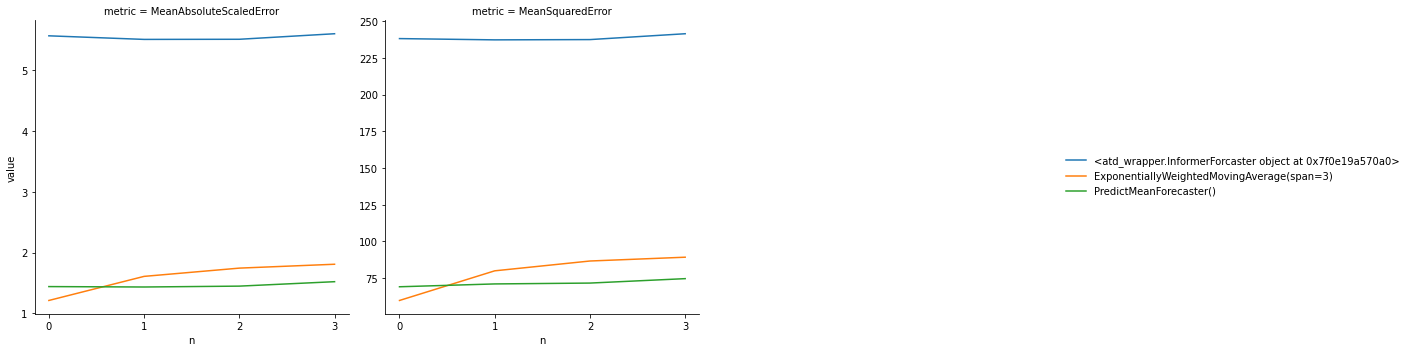

In [18]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

In [ ]:
args = dotdict()


args.enc_in = 20 # encoder input size
args.dec_in = 20 # decoder input size
args.c_out = 20 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 3 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=36
args.label_len=36
args.pred_len=1


args.batch_size = 45
args.learning_rate = 0.00001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=6
args.patience=5

In [ ]:
lispDL1 = InformerForcaster(args)

In [ ]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL1,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

In [ ]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))